# Portfolio Management - Coursework 2: Asset simulation and Liability Driven Portfolios

Welcome to Coursework 2! In this coursework you will dive deeper into portfolio construction,this time using the concepts of asset simulation and liability-driven portfolio management. Different to cw1, this implies start thinking about **investment strategies**.

This assignment is designed to practice all the concepts studied in this section of the course, and it is mainly build upon your foundational knowledge in mathematical finance, with a strong focus on practical application and critical analysis of portfolio management strategies. In particular, we will explore how to simulate asset returns, construct liability-driven portfolios, and analyze the alignment between asset performance and liability obligations.

Here's a breakdown of the topics you will cover:

1. Portfolio Management Basics:
  
  We use the foundational concepts in managing a collection of financial assets studied in the first part of the course, and in your previous courses in mathematical finance. The primary goal is to maximize returns while managing risks through diversification, asset allocation, and selection strategies.

2. Asset Simulation:
  You will explore asset simulation techniques, which are essential for predicting future asset values based on historical data, statistical models, or random processes. By simulating possible future outcomes, you will learn to assess potential portfolio performance under different scenarios.

3. Liability-Driven Investment (LDI):
  You will be introduced to strategies where investments are selected to meet specific future liabilities, such as pension payouts. LDI focuses on aligning assets with liabilities to minimize the risk of not meeting obligations. This approach is particularly relevant for institutions like pension funds, where cash flow alignment is crucial.

There are two types of exercises, those marked with letter **E** represent programmatic exercises that guide you to implement the concepts seen in class. And those marked with **R**, which are applications or extensions of the basic concepts studied in exercises **E** and are intended to be used for your report. Thus, your report must be based on exercises R, and to complete exercises R you need to complete exercises E.

Also, this coursework is structured in a progressive fashion, i.e. we use the results from each section for the next one, so that we end up combining all we see through the exercises. As such, you are also expected to write your report in this way, building up a general topic step by step, like telling a story. Try to build up progressively adding cocnepts and results.

Notice that the output of some E exercises is given so that you can check that your implementation is working as expected.

You are expected to:

1. Complete both types of exercises and write a report with your results and conclusions. If you have done your previous coursework many exercises should be easy to complete.

2. For the report you must include all the results from exercises R in a story-telling fashion. You need to explain what you are doing, why and how, and to interpret your results and describe what they mean the best you can and how they are related to other results and the general topic.The report is based in exercises R, and to do exercises R you need first to complete exercises E.

3. No code should be included in the main text of the final report, just include figures, tables, numbers, and your analysis of results and interpretations.

4. Figures and tables are required to have captions to understand what they represent, and when your refer to them on your report you need to indicate which number of Table, Figure, etc. you are refering to.

5. The notebook you have obtained with your code must be saved in pdf format and included as a separe file that serves as appendix for the report.

6. The final report must be less han 3500 words, and contain at the end the count of words. The report must be written in Latex but submitted just as pdf, together with the notebook with your code as pdf. This means that, at the end, you must submit ONLY TWO pdfs.

Any error to meet these conditions will make your work not considered for grading.

You may start now. Good luck!

## 1 CPPI

You already know how to build a portfolio. Now, we'll implement our first dynamic portfolio strategy called Constant Proportion Portfolio Insurance (CPPI), which balances growth potential with downside protection.

CPPI works by adjusting the portfolio's exposure to risky assets based on a "cushion," which is the difference between the portfolio's current value and a predefined floor (minimum acceptable level). Here's how it functions:

$\text{Investment in Risky Asset}=Multiplier×(Portfolio Value−Floor)$

- Define the Floor: Set a minimum value (floor) below which the portfolio should not fall. This could be based on specific needs or risk tolerance.

- Calculate the Cushion: The cushion is calculated as the difference between the current portfolio value and the floor. The cushion represents funds that can be invested in risky assets since it’s the amount the portfolio can "afford" to risk.

- Apply the Multiplier: A multiplier is used to determine how much of the cushion should be allocated to risky assets. For example, if the multiplier is 3 and the cushion is 100, then 300 would be allocated to risky assets.

- Adjust Portfolio Dynamically: As the portfolio's value changes, the cushion changes as well. The portfolio is rebalanced periodically to adjust the allocation between risky and safe assets according to the updated cushion.

When the portfolio performs well, the cushion grows, allowing for more investment in risky assets. Conversely, if the portfolio value falls, the cushion shrinks, prompting a shift toward safer assets to protect the floor. This approach maintains a balance between growth and protection, making CPPI a suitable strategy for investors seeking controlled risk exposure with a guaranteed minimum value.


#### Load data and libraries
As always strat by loading some libraries and data that would be useful for the practice.

In [1]:
# Importar bibliotecas
import pandas as pd  # Para manejar datos en formato de tablas y series
import numpy as np   # Para cálculos matemáticos y manejo de matrices
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones

In [3]:
# Get the number of firms in the index for each industry (index30_nfirms.csv)
# Cargar los datos del índice total del mercado (index30_size.csv)
df_index_size = pd.read_csv("index30_size.csv", header=0, index_col=0, dtype=str)  # Cargar como string
df_index_size.index = pd.to_datetime(df_index_size.index, format='%Y%m')  # Convertir formato YYYYMM a datetime
df_index_size.index = df_index_size.index.to_period('M')  # Convertir a PeriodIndex mensual
df_index_size.columns = df_index_size.columns.str.strip()  # Eliminar espacios en los nombres de las columnas

##### **E1. Load the total market index size and industry firms. Give time series format in monthly periods. Note: Do not transform to percentages.**

In [4]:
# Cargar el número de empresas en el índice para cada industria (index30_nfirms.csv)
df_index_firms = pd.read_csv("index30_nfirms.csv", header=0, index_col=0, dtype=str)  # Cargar como string
df_index_firms.index = pd.to_datetime(df_index_firms.index, format='%Y%m')  # Convertir formato YYYYMM a datetime
df_index_firms.index = df_index_firms.index.to_period('M')  # Convertir a PeriodIndex mensual
df_index_firms.columns = df_index_firms.columns.str.strip()  # Eliminar espacios en los nombres de las columnas

# Cargar los datos de los rendimientos totales del mercado (index30_returns.csv)
df_returns = pd.read_csv("index30_returns.csv", header=0, index_col=0, dtype=str)  # Cargar como string
df_returns.index = pd.to_datetime(df_returns.index, format='%Y%m')  # Convertir formato YYYYMM a datetime
df_returns.index = df_returns.index.to_period('M')  # Convertir a PeriodIndex mensual
df_returns = df_returns.astype(float) / 100  # Convertir a porcentajes
df_returns.columns = df_returns.columns.str.strip()  # Eliminar espacios en los nombres de las columnas

In [5]:
# Mostrar las primeras filas para verificar
#print(df_index_size.head())
#print(df_index_firms.head())
#print(df_returns.head())

Now, you have the number of firms in industry for this market, and the average firm size for each of these industries at different periods. You will calculate the market capitalization for each industry and determine the overall market return based on weighted capitalization.

Market capitalization represents the total value of each industry. Understanding each industry's market cap helps determine its influence in the overall market. It is computed as follows:

$\text{Industry Market Cap}_i=\text{Number of Firms in Industry}_i*\text{Average Firm Size}_i$

The sum of the Industry Market Capitalization returns the (Total) Market Capitalization, which is the size of the market at each period.

And, by dividing the capitalization of each industry by the market capitalization we obtain the weighted capitalization. Capitalization weight indicates how much each industry contributes to the overall market. This is essential for calculating a weighted market return that reflects each industry's relative importance.

Once you have these quantities, you can compute the total market return as a weighted average of individual industry returns. This is:

$\text{Total Market Return}=∑_i(\text{Capitalization Weight}_i*\text{Industry Return}_i)$


##### **E2. Calculate Market Capitalization and Weighted Market Return**

In [6]:
# Convertir los datos de los DataFrames a numéricos
df_index_firms = df_index_firms.astype(float)  # Convertir a tipo float
df_index_size = df_index_size.astype(float)    # Convertir a tipo float

# Cálculo de la capitalización de mercado
ind_mktcap = df_index_firms * df_index_size  # Número de empresas * Tamaño promedio
total_mktcap = ind_mktcap.sum(axis="columns")  # Suma de la capitalización de mercado para obtener el total

# Capitalización ponderada
ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows")  # División por la capitalización total del mercado

# Rendimiento total del mercado (rendimiento ponderado por capitalización)
total_market_return = (ind_capweight * df_returns).sum(axis="columns")  # Suma ponderada de rendimientos por industria

# Mostrar resultados iniciales
print("Capitalización de Mercado por Industria:\n", ind_mktcap.head())
print("\nCapitalización Total del Mercado:\n", total_mktcap.head())
print("\nPeso de Capitalización por Industria:\n", ind_capweight.head())
print("\nRendimiento Total del Mercado:\n", total_market_return.head())


Capitalización de Mercado por Industria:
             Food   Beer    Smoke   Games  Books   Hshld   Clths    Hlth  \
1926-07  1547.14  21.36   955.52  184.87  24.04  178.16  220.32  178.64   
1926-08  1552.30  20.25   967.52  190.19  26.66  177.04  237.96  180.60   
1926-09  1591.00  25.74  1024.48  191.10  29.34  169.44  231.48  187.11   
1926-10  1597.02  26.76  1030.72  201.32  28.84  169.84  228.36  188.09   
1926-11  1542.84  25.86  1041.28  191.66  31.58  161.12  228.36  185.78   

           Chems  Txtls  ...    Telcm  Servs   BusEq   Paper    Trans  Whlsl  \
1926-07   979.03  80.34  ...  1751.80  40.80  396.90  212.10  4951.34   2.38   
1926-08  1056.21  80.60  ...  1766.35  44.25  404.18  227.16  5031.26   1.80   
1926-09  1114.01  87.23  ...  1804.80  45.15  417.27  220.92  5255.48   1.90   
1926-10  1163.99  88.66  ...  1820.80  45.90  416.64  208.62  5241.42   1.76   
1926-11  1106.02  88.92  ...  1818.70  44.67  411.18  196.80  5087.50   1.48   

           Rtail  Meals   

For the following, consider just the returns for Steel, Finance, and Beer industries from 2000 onwards. These industries will form our risky assets.

In [7]:
# Seleccionar los retornos de las industrias Steel, Finance y Beer desde 2000
df_risky = df_returns.loc['2000-01':, ['Steel', 'Fin', 'Beer']]

# Definir un activo seguro con un rendimiento mensual fijo (por ejemplo, 0.2% mensual)
safe_asset_return = 0.002  # 0.2% en formato decimal
df_safe = pd.DataFrame(safe_asset_return, index=df_risky.index, columns=['Safe Asset'])

# Mostrar resultados
print("Rendimientos de activos de riesgo (Steel, Finance, Beer):\n", df_risky.head())
print("\nRendimientos del activo seguro:\n", df_safe.head())


Rendimientos de activos de riesgo (Steel, Finance, Beer):
           Steel     Fin    Beer
2000-01 -0.0277 -0.0442 -0.0228
2000-02  0.0684 -0.0849 -0.1164
2000-03  0.0349  0.1669  0.0013
2000-04 -0.0084 -0.0425  0.0368
2000-05 -0.0492  0.0506  0.1187

Rendimientos del activo seguro:
          Safe Asset
2000-01       0.002
2000-02       0.002
2000-03       0.002
2000-04       0.002
2000-05       0.002


We also need safe assets. For this, we create a dataframe with the same number of returns and assume a monthly fixed safe return of 0.02 annualized. This is, we have a risk-free asset that pays 0.02 per year.

In [8]:
# Asegúrate de que df_risky está definido
df_risky = df_returns.loc['2000-01':, ['Steel', 'Fin', 'Beer']]

# Crear df_safe con una sola columna y el mismo índice que df_risky
df_safe = pd.DataFrame(0.02 / 12, index=df_risky.index, columns=['Safe Asset'])

# Mostrar resultados
print("\nRendimientos del activo seguro:\n", df_safe.head())



Rendimientos del activo seguro:
          Safe Asset
2000-01    0.001667
2000-02    0.001667
2000-03    0.001667
2000-04    0.001667
2000-05    0.001667


As we have risky and risk-free assets, let's implement CPPI and explore how it works. First, assume we invest 1000 USD, that the floor (the minimum value below which the portfolio should not fall) is 80% of the initial value, and that the multiplier (the level of exposure to risky assets based on the cushion, i.e. the aggressiveness of risky asset allocations) is 3.

Resultados de CPPI:
          Portfolio Value  Risky Allocation  Safe Allocation     Cushion
2000-01       981.726667        600.000000       400.000000  200.000000
2000-02       958.302770        545.180000       436.546667  181.726667
2000-03       991.259721        474.908311       483.394459  158.302770
2000-04       989.258759        573.779162       417.480559  191.259721
2000-05      1012.691207        567.776278       421.482481  189.258759


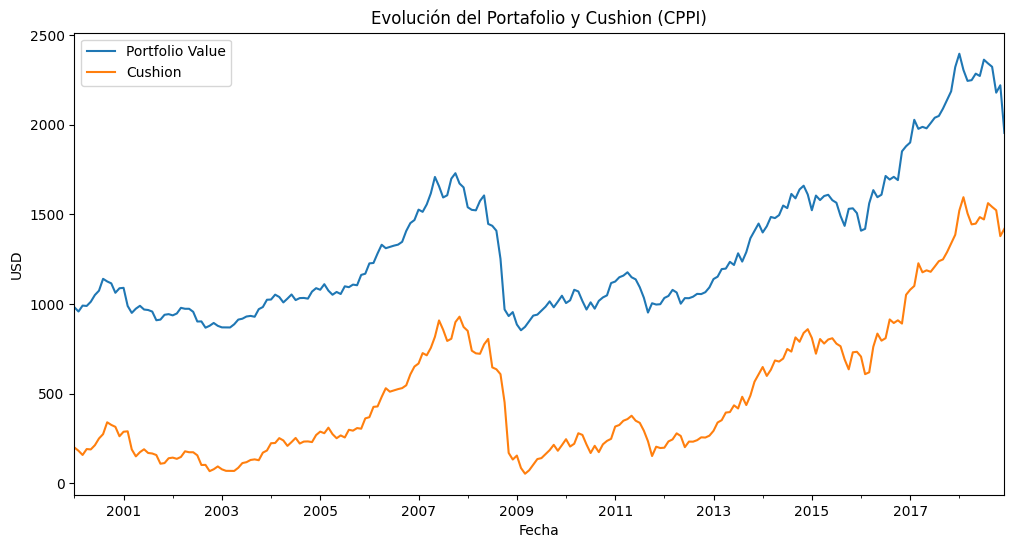

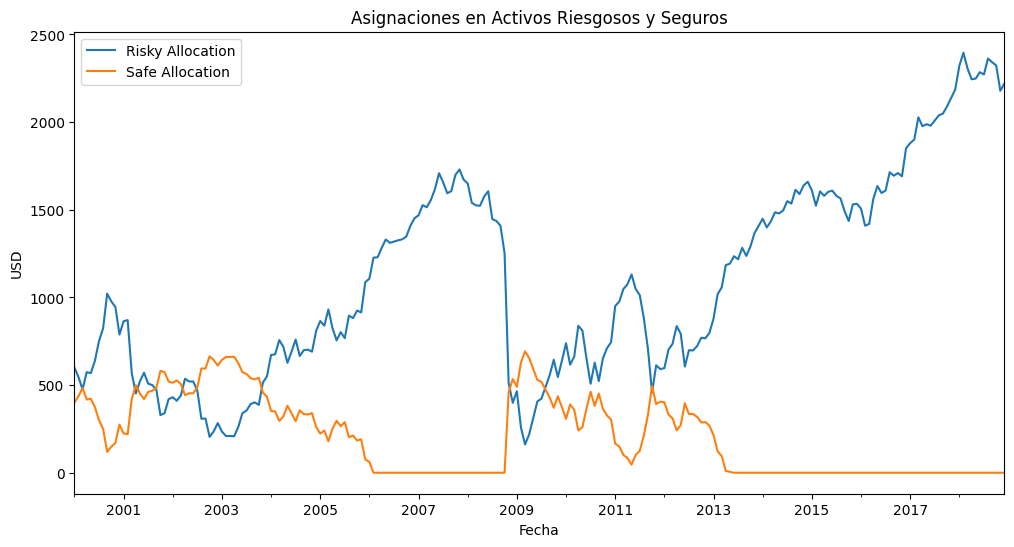

In [9]:
# Configuración inicial
start = 1000  # Valor inicial del portafolio
floor = 0.8   # Floor como porcentaje del valor inicial
m = 3         # Multiplicador de CPPI

# Definir valores iniciales
account_value = start  # Valor inicial de la inversión
floor_value = start * floor  # Floor aplicado al valor de la cuenta

# Historial para seguimiento
portfolio_history = []  # Historial del valor del portafolio
risky_allocations = []  # Asignaciones en activos riesgosos
safe_allocations = []   # Asignaciones en activos seguros
cushion_history = []    # Historial del cushion

# Iterar sobre los periodos de inversión
for date in df_risky.index:
    # Calcular el retorno promedio de los activos riesgosos y el retorno del activo seguro
    risky_return = df_risky.loc[date].mean()
    safe_return = df_safe.loc[date, 'Safe Asset']

    # Calcular el cushion
    cushion = account_value - floor_value

    # Calcular asignaciones
    risky_allocation = max(m * cushion, 0)  # Asignación a activos riesgosos
    risky_allocation = min(risky_allocation, account_value)  # No puede exceder el valor total
    safe_allocation = account_value - risky_allocation  # Resto en activos seguros

    # Actualizar el valor de la cuenta
    account_value = (risky_allocation * (1 + risky_return)) + (safe_allocation * (1 + safe_return))

    # Guardar en historial
    portfolio_history.append(account_value)
    risky_allocations.append(risky_allocation)
    safe_allocations.append(safe_allocation)
    cushion_history.append(cushion)

# Convertir resultados a un DataFrame
cppi_results = pd.DataFrame({
    'Portfolio Value': portfolio_history,
    'Risky Allocation': risky_allocations,
    'Safe Allocation': safe_allocations,
    'Cushion': cushion_history
}, index=df_risky.index)

# Mostrar los primeros resultados
print("Resultados de CPPI:\n", cppi_results.head())

# Graficar evolución del portafolio y cushion
cppi_results[['Portfolio Value', 'Cushion']].plot(title="Evolución del Portafolio y Cushion (CPPI)", figsize=(12, 6))
plt.ylabel("USD")
plt.xlabel("Fecha")
plt.show()

# Graficar asignaciones
cppi_results[['Risky Allocation', 'Safe Allocation']].plot(title="Asignaciones en Activos Riesgosos y Seguros", figsize=(12, 6))
plt.ylabel("USD")
plt.xlabel("Fecha")
plt.show()


CPPI works through out time, thus we need to define an entity to save the results of our simulated example. For this, we use dataframes of with the same number of trading periods than our risky assets, which are the number of steps for the simulation. As we are interested in tracking the evolution of portfolio values, risky and safe allocations, and total returns over time, we are going to define 3 dataframes.

In [10]:
# Parámetros iniciales
start = 1000  # Valor inicial del portafolio
floor = 0.8   # Porcentaje para el floor
m = 3         # Multiplicador CPPI

account_value = start  # Valor inicial del portafolio
floor_value = start * floor  # Valor inicial del floor

# Inicialización de DataFrames
dates = df_risky.index
account_history = pd.DataFrame(index=dates, columns=['Portfolio Value'])  # Evolución del portafolio
cushion_history = pd.DataFrame(index=dates, columns=['Cushion'])  # Cushion
risky_w_history = pd.DataFrame(index=dates, columns=['Risky Weight'])  # Peso riesgoso

# Iterar sobre cada fecha para simular CPPI
for date in dates:
    # Calcular el retorno promedio de los activos riesgosos y del activo seguro
    risky_return = df_risky.loc[date].mean()
    safe_return = df_safe.loc[date, 'Safe Asset']

    # Calcular el cushion
    cushion = account_value - floor_value

    # Calcular el peso riesgoso
    risky_weight = max(m * (cushion / account_value), 0)  # Proporción asignada al activo riesgoso
    risky_weight = min(risky_weight, 1)  # Limitar entre 0 y 1

    # Actualizar el valor del portafolio
    risky_allocation = account_value * risky_weight
    safe_allocation = account_value - risky_allocation
    account_value = (risky_allocation * (1 + risky_return)) + (safe_allocation * (1 + safe_return))

    # Guardar en rastreadores
    account_history.loc[date, 'Portfolio Value'] = account_value
    cushion_history.loc[date, 'Cushion'] = cushion
    risky_w_history.loc[date, 'Risky Weight'] = risky_weight

# Mostrar los primeros resultados
print("Evolución del portafolio:\n", account_history.head())
print("\nCushion:\n", cushion_history.head())
print("\nPesos de activos riesgosos:\n", risky_w_history.head())


Evolución del portafolio:
         Portfolio Value
2000-01      981.726667
2000-02       958.30277
2000-03      991.259721
2000-04      989.258759
2000-05     1012.691207

Cushion:
             Cushion
2000-01       200.0
2000-02  181.726667
2000-03   158.30277
2000-04  191.259721
2000-05  189.258759

Pesos de activos riesgosos:
         Risky Weight
2000-01          0.6
2000-02     0.555328
2000-03     0.495572
2000-04     0.578838
2000-05     0.573941


Awesome, according to the definition we have everything we need to simulate a CPPI strategy. The following code implements CPPI with a loop that adjusts the portfolio's allocation between risky and safe assets dynamically based on changes in the portfolio value and cushion, aiming to grow the portfolio while maintaining a minimum guaranteed level (floor). This implies:

1. Calculate the cushion:
  $\text{Cushion=(Portfolio Value−Floor)/Portfolio Value}$
2. Allocation Weights for the Risky Asset:
  $\text{Risky Investment Weights=Multiplier×Cushion}$
3. Allocation Weights for the Safe Asset: Any remaining funds are allocated to the safe asset.
4. Allocate money to assets: Apply the weights to the current account value.
5. Update the account value.

$\text{New Portfolio Value=(Allocation to Risky×(1+Risky Return))+(Allocation to Safe×(1+Safe Return))}$




Remember, our defined parameters allow you to control the level of risk and protection within the CPPI strategy. The floor ensures downside protection, while the multiplier allows growth by dynamically allocating more to risky assets when the portfolio performs well.

Caution: The loop saves the values being tracket to the dfs we defined to track them, so if you run the loop completely it would change the values saved.


##### **E3. Implement CCPI**



In [11]:
# Configuración Inicial para CPPI en Google Colab

# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros iniciales
start = 1000  # Valor inicial
floor = 0.8   # Piso como porcentaje del valor inicial
m = 3         # Multiplicador CPPI

# Valores iniciales
account_value = start
floor_value = start * floor

# Inicializar DataFrames de seguimiento
dates = df_risky.index  # Supone que df_risky ya está cargado
n_steps = len(dates)
account_history = pd.DataFrame(index=dates, columns=df_risky.columns)  # Historial de valores por activo
cushion_history = pd.DataFrame(index=dates, columns=['Cushion'])       # Cushion total
risky_w_history = pd.DataFrame(index=dates, columns=['Risky Weight'])  # Peso riesgoso total
# Simulación CPPI
for step in range(n_steps):
    # Calcular el cushion
    cushion = max((account_value - floor_value) / account_value, 0)  # Evitar valores negativos

    # Calcular el peso para los activos riesgosos
    risky_w = min(m * cushion, 1)  # Multiplicador aplicado al cushion (máx 1)
    risky_w = max(risky_w, 0)      # Limitar al rango [0, 1]

    # Calcular el peso para los activos seguros
    safe_w = 1 - risky_w           # Complemento del peso riesgoso

    # Calcular asignaciones
    risky_alloc = risky_w * account_value
    safe_alloc = safe_w * account_value

    # Calcular retornos de los activos
    risky_return = df_risky.iloc[step].mean()  # Promedio de rendimientos riesgosos
    safe_return = df_safe.iloc[step, 0]       # Retorno del activo seguro

    # Actualizar el valor de la cuenta
    account_value = (risky_alloc * (1 + risky_return)) + (safe_alloc * (1 + safe_return))

    # Guardar valores en los DataFrames de seguimiento
    cushion_history.iloc[step] = cushion        # Cushion actual
    account_history.iloc[step] = account_value  # Valor total del portafolio
    risky_w_history.iloc[step] = risky_w        # Peso riesgoso total

# Mostrar resultados finales
print("Simulación CPPI completada.")
print("Historial de valores del portafolio:\n", account_history.tail())
print("Historial de pesos riesgosos:\n", risky_w_history.tail())
print("Historial del cushion:\n", cushion_history.tail())



Simulación CPPI completada.
Historial de valores del portafolio:
                Steel          Fin         Beer
2018-08  2341.664045  2341.664045  2341.664045
2018-09  2322.852677  2322.852677  2322.852677
2018-10  2178.603526  2178.603526  2178.603526
2018-11  2219.851753  2219.851753  2219.851753
2018-12  1954.135498  1954.135498  1954.135498
Historial de pesos riesgosos:
         Risky Weight
2018-08            1
2018-09            1
2018-10            1
2018-11            1
2018-12            1
Historial del cushion:
           Cushion
2018-08  0.661369
2018-09  0.658363
2018-10  0.655596
2018-11  0.632792
2018-12  0.639616


In [12]:
#First values of our CCPI
account_history.head()
#account_history.tail()

Steel          Fin         Beer
2000-01   981.726667   981.726667   981.726667
2000-02    958.30277    958.30277    958.30277
2000-03   991.259721   991.259721   991.259721
2000-04   989.258759   989.258759   989.258759
2000-05  1012.691207  1012.691207  1012.691207

Before seeing the effects of CPPI strategy, what would have happened if we had put all the money in the risky assets and not using the CPPI? Well, this is basically the cumulative returns of the risky assets:

<Axes: >

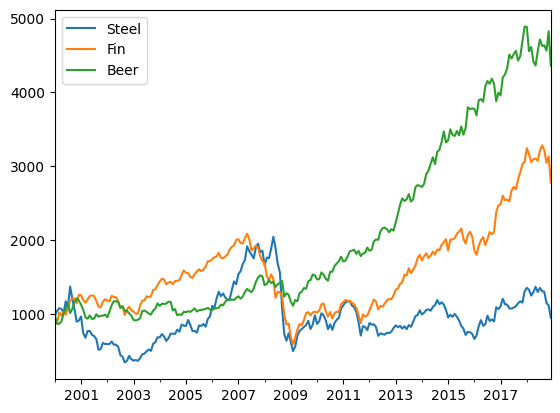

In [13]:
#Plot the account history for one asset, comparing CPPI-managed wealth with a fully risky allocation strategy.
risky_wealth = start * (1 + df_risky).cumprod()
risky_wealth.plot()

But, what is the investment allocation recommended using CPPI? Well, we can know this by plotting our simulated weights.

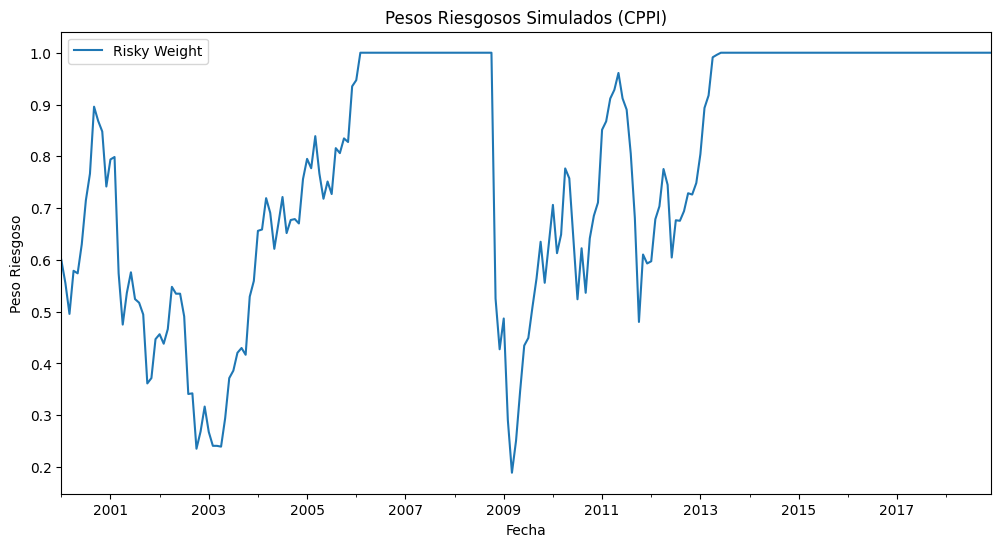

In [14]:
# Graficar la evolución de los pesos riesgosos
risky_w_history.plot(title="Pesos Riesgosos Simulados (CPPI)", figsize=(12, 6))
plt.ylabel("Peso Riesgoso")
plt.xlabel("Fecha")
plt.legend(['Risky Weight'])
plt.show()


This is the evolution of the allocation to risky assets. Notice the increment in investment on beer. Let's compare then the CPPI vs Full Risky Allocation to beer:

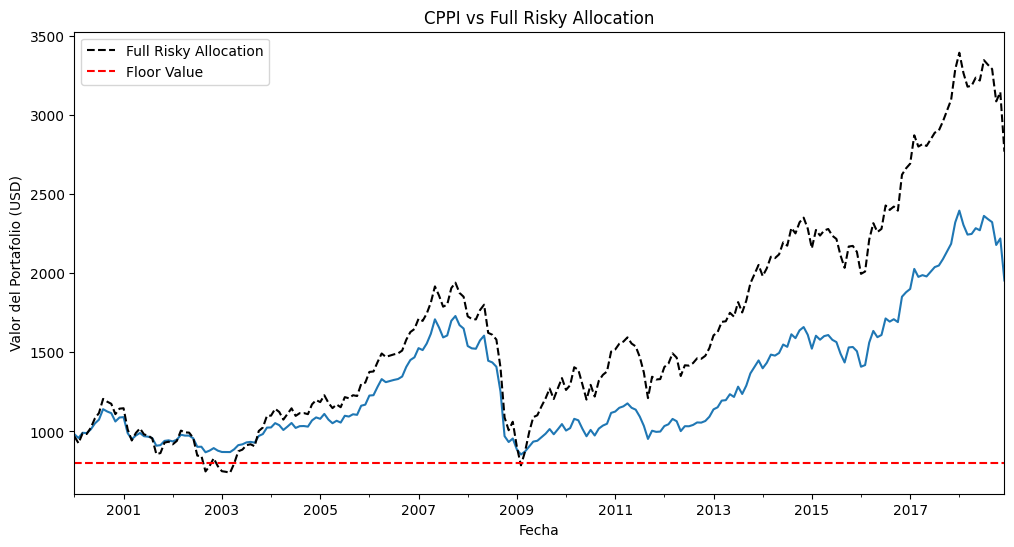

In [15]:
# Gráfica del portafolio CPPI vs Full Risky Allocation
ax = account_history.mean(axis=1).plot(figsize=(12, 6), title="CPPI vs Full Risky Allocation")
risky_wealth = start * (1 + df_risky.mean(axis=1)).cumprod()  # Promedio de Full Risky Allocation
risky_wealth.plot(ax=ax, style="k--", label="Full Risky Allocation")
plt.axhline(y=floor_value, color='r', linestyle="--", label="Floor Value")
plt.ylabel("Valor del Portafolio (USD)")
plt.xlabel("Fecha")
plt.legend()
plt.show()


In [16]:
# Valores iniciales y finales
start_value = start
cppi_final_value = account_history["Beer"].iloc[-1]  # Último valor de CPPI (Beer)
full_risky_final_value = risky_wealth.iloc[-1]       # Último valor de Full Risky Allocation (Beer)

# Ganancias acumuladas
cppi_gain = (cppi_final_value - start_value) / start_value * 100
full_risky_gain = (full_risky_final_value - start_value) / start_value * 100

# Mostrar resultados
print(f"Valor inicial del portafolio: {start_value} USD")
print(f"Valor final (CPPI - Beer): {cppi_final_value:.2f} USD")
print(f"Ganancia acumulada (CPPI - Beer): {cppi_gain:.2f}%")
print(f"Valor final (Full Risky Allocation - Beer): {full_risky_final_value:.2f} USD")
print(f"Ganancia acumulada (Full Risky Allocation - Beer): {full_risky_gain:.2f}%")


Valor inicial del portafolio: 1000 USD
Valor final (CPPI - Beer): 1954.14 USD
Ganancia acumulada (CPPI - Beer): 95.41%
Valor final (Full Risky Allocation - Beer): 2768.40 USD
Ganancia acumulada (Full Risky Allocation - Beer): 176.84%


What can you observe?

Notice that allocation to beer increased, and we are far away from the floor. The no CPPI had more volatility. In practice, we would had incresed the floor, as we are far away from it, otherwise we are very conservative.

#### **E4. Compare CPPI vs Risky Allocation for Finance and Steel**

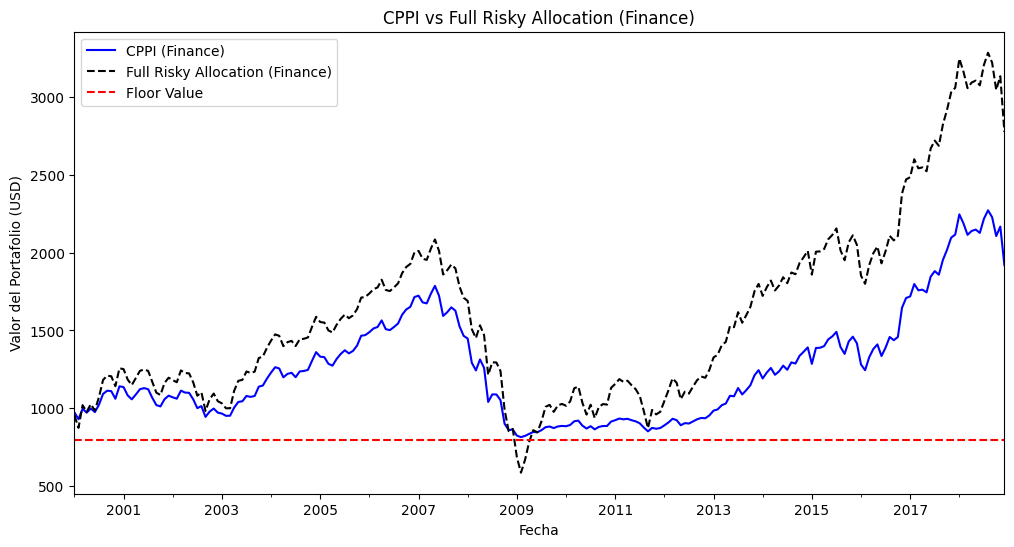

In [17]:
# CPPI para Finance
account_history_finance = pd.DataFrame(index=dates, columns=["Finance"])
account_value = start

for step in range(n_steps):
    # Calcular el cushion
    cushion = max((account_value - floor_value) / account_value, 0)

    # Calcular pesos
    risky_w = min(m * cushion, 1)
    safe_w = 1 - risky_w

    # Calcular asignaciones
    risky_alloc = risky_w * account_value
    safe_alloc = safe_w * account_value

    # Calcular retornos y actualizar el portafolio
    risky_return = df_risky["Fin"].iloc[step]
    safe_return = df_safe.iloc[step, 0]
    account_value = (risky_alloc * (1 + risky_return)) + (safe_alloc * (1 + safe_return))

    # Guardar resultados
    account_history_finance.loc[dates[step], "Finance"] = account_value

# Full Risky Allocation para Finance
risky_wealth_finance = start * (1 + df_risky["Fin"]).cumprod()

# Gráfica de Finance
# Gráfica de Finance
ax = account_history_finance["Finance"].plot(figsize=(12, 6), title="CPPI vs Full Risky Allocation (Finance)", label="CPPI (Finance)", color="blue")
risky_wealth_finance.plot(ax=ax, linestyle="--", label="Full Risky Allocation (Finance)", color="black")  # Usar 'linestyle'
plt.axhline(y=floor_value, color='r', linestyle="--", label="Floor Value")
plt.ylabel("Valor del Portafolio (USD)")
plt.xlabel("Fecha")
plt.legend()
plt.show()



Here the effect of CPPI is more cleared, as in 2009 the allocation was really good, we had no violation and we had protection when the market crashed, the defect was that when the market rose we didn't enjoy all the upside benefit.

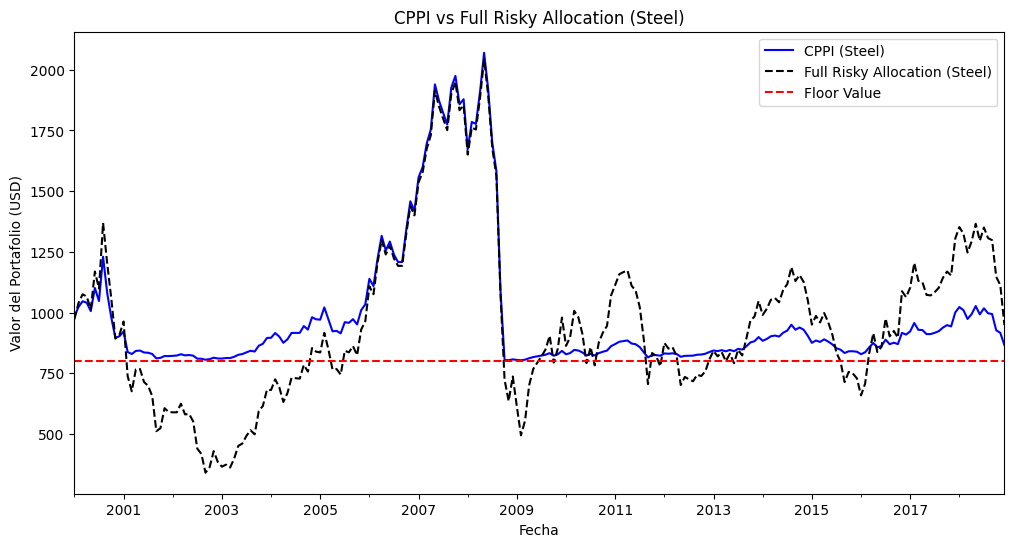

In [18]:
# Inicializar DataFrame para CPPI de Steel
account_history_steel = pd.DataFrame(index=dates, columns=["Steel"])
account_value = start  # Reiniciar el valor inicial del portafolio

# Simulación CPPI para Steel
for step in range(n_steps):
    # Calcular el cushion
    cushion = max((account_value - floor_value) / account_value, 0)

    # Calcular pesos
    risky_w = min(m * cushion, 1)
    safe_w = 1 - risky_w

    # Calcular asignaciones
    risky_alloc = risky_w * account_value
    safe_alloc = safe_w * account_value

    # Calcular retornos y actualizar el portafolio
    risky_return = df_risky["Steel"].iloc[step]
    safe_return = df_safe.iloc[step, 0]
    account_value = (risky_alloc * (1 + risky_return)) + (safe_alloc * (1 + safe_return))

    # Guardar resultados en el DataFrame
    account_history_steel.loc[dates[step], "Steel"] = account_value

# Calcular estrategia Full Risky Allocation para Steel
risky_wealth_steel = start * (1 + df_risky["Steel"]).cumprod()

# Gráfica de CPPI vs Full Risky Allocation para Steel
ax = account_history_steel["Steel"].plot(figsize=(12, 6), title="CPPI vs Full Risky Allocation (Steel)", label="CPPI (Steel)", color="blue")
risky_wealth_steel.plot(ax=ax, linestyle="--", label="Full Risky Allocation (Steel)", color="black")  # Usar 'linestyle'
plt.axhline(y=floor_value, color='r', linestyle="--", label="Floor Value")
plt.ylabel("Valor del Portafolio (USD)")
plt.xlabel("Fecha")
plt.legend()
plt.show()


To further analyze this, we are going to make use of our previous risk-returns metrics from cw1. Namely, annualized returns, annualized volatility, skewness, kurtosis, Cornish-Fisher VaR, Historic VaR, CVaR, Sharpe Ratio, and Max Drawdown.

##### **E5. Compute the summary statistics studied in CW1 and apply them to df_risky**

In [19]:
def summary_stats(r):
    """
    Calculate summary statistics for returns.
    Includes annualized return, volatility, skewness, kurtosis, VaR, CVaR, Sharpe ratio, and max drawdown.
    """
    # Calculate annualized return using compounded growth
    compounded_growth = (1 + r).prod()
    n_periods = r.shape[0]
    ann_r = (compounded_growth ** (252 / n_periods)) - 1  # 252 días de trading al año

    # Annualized volatility (252 días de trading al año)
    ann_vol = r.std() * np.sqrt(252)

    # Skewness and kurtosis
    skew = r.skew()
    kurt = r.kurt()

    # Value at Risk (5%) using Cornish-Fisher expansion
    z = 1.645  # Z-score for 5% VaR
    cf_var5 = (r.mean() - z * r.std())

    # Historical VaR (5%)
    hist_var5 = -r.quantile(0.05)

    # Conditional Value at Risk (CVaR)
    cvar5 = r[r <= hist_var5].mean()

    # Sharpe Ratio assuming a risk-free rate of 0 for simplicity
    sharpe_ratio = ann_r / ann_vol.replace(0, np.nan)  # Avoid division by zero by replacing 0 with NaN

    # Maximum drawdown
    cumulative = (1 + r).cumprod()
    peak = cumulative.cummax()
    max_dd = ((cumulative / peak) - 1).min()

    # Compile results into a DataFrame
    return pd.DataFrame({
        "Annualized Return": ann_r,
        "Annualized Vol": ann_vol,
        "Skewness": skew,
        "Kurtosis": kurt,
        "Cornish-Fisher VaR(5%)": cf_var5,
        "Historic VaR(5%)": hist_var5,
        "CVar(5%)": cvar5,
        "Sharpe Ratio": sharpe_ratio,
        "Max Drawdown": max_dd
    })


In [20]:
# Display summary statistics for risky assets
summary_stats(df_risky)

#Note: The values for Steel are:
#Annualized Return	Annualized Vol	Skewness	Kurtosis	Cornish-Fisher VaR(5%)	Historic VaR(5%)	CVar(5%)	Sharpe Ratio	Max Drawdown
#Steel	-0.002790	0.312368	-0.328499	1.196664	-0.480687	0.140580	0.208117	-0.008931	-0.758017

Annualized Return  Annualized Vol  Skewness  Kurtosis  \
Steel          -0.056980        1.431448 -0.328499  1.196664   
Fin             2.088434        0.884019 -0.536756  2.066782   
Beer            4.092715        0.636633 -0.496820  1.226821   

       Cornish-Fisher VaR(5%)  Historic VaR(5%)  CVar(5%)  Sharpe Ratio  \
Steel               -0.144389          0.140580 -0.006139     -0.039806   
Fin                 -0.085546          0.090815  0.000094      2.362430   
Beer                -0.058683          0.061100  0.001866      6.428688   

       Max Drawdown  
Steel     -0.758017  
Fin       -0.718465  
Beer      -0.271368

Great. You have already implemented CPPI and metrics to evaluate investment strategies. It is time to transform our strategy into a function that we can use whenever we want.

##### **E6. Implement CPPI as a function**



In [21]:
def run_cppi(risky_r, safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03):
    """
    Implementación de CPPI corregida.
    """
    # Configuración inicial
    dates = risky_r.index
    n_steps = len(dates)
    account_value = start
    floor_value = start * floor

    # Validar `risky_r`
    if isinstance(risky_r, pd.Series):
        risky_r = pd.DataFrame(risky_r, columns=["R"])

    # Validar `safe_r`
    if safe_r is None or safe_r.empty:
        safe_r = pd.DataFrame(index=risky_r.index, columns=risky_r.columns)
        safe_r.values[:] = riskfree_rate / 12  # Asignar tasa libre de riesgo

    # Inicializar DataFrames
    account_history = pd.DataFrame(index=dates, columns=risky_r.columns)
    cushion_history = pd.DataFrame(index=dates, columns=risky_r.columns)
    risky_w_history = pd.DataFrame(index=dates, columns=risky_r.columns)

    # Simulación CPPI
    for step in range(n_steps):
        cushion = max((account_value - floor_value) / account_value, 0)
        risky_w = min(m * cushion, 1)
        risky_w = max(risky_w, 0)

        # Calcular pesos seguros
        safe_w = 1 - risky_w

        # Asignaciones
        risky_alloc = risky_w * account_value
        safe_alloc = safe_w * account_value

        # Actualizar valor del portafolio
        risky_return = risky_r.iloc[step].mean()
        safe_return = safe_r.iloc[step].mean()
        account_value = risky_alloc * (1 + risky_return) + safe_alloc * (1 + safe_return)

        # Guardar resultados
        account_history.iloc[step] = account_value
        cushion_history.iloc[step] = cushion
        risky_w_history.iloc[step] = risky_w

    # Calcular riqueza de activos riesgosos
    risky_wealth = start * (1 + risky_r).cumprod()

    # Empaquetar resultados
    backtest_result = {
        "Wealth": account_history,
        "Risky Wealth": risky_wealth,
        "Risk Budget": cushion_history,
        "Risky Allocation": risky_w_history,
        "m": m,
        "start": start,
        "floor": floor,
        "risky_r": risky_r,
        "safe_r": safe_r
    }

    return backtest_result


Apply CCPI to our df_risky and compute the summary statistics.

In [22]:
# Ejecutar CPPI
btr = run_cppi(df_risky)

# Calcular los retornos del portafolio CPPI
cppi_returns = btr["Wealth"].pct_change().dropna()

# Calcular estadísticas resumen
cppi_stats = summary_stats(cppi_returns)

# Mostrar resultados
print(cppi_stats)


       Annualized Return  Annualized Vol  Skewness  Kurtosis  \
Steel           1.323619        0.620632 -1.292971  5.163736   
Fin             1.323619        0.620632 -1.292971  5.163736   
Beer            1.323619        0.620632 -1.292971  5.163736   

       Cornish-Fisher VaR(5%)  Historic VaR(5%)  CVar(5%)  Sharpe Ratio  \
Steel               -0.060174          0.061115  0.000984      2.132698   
Fin                 -0.060174          0.061115  0.000984      2.132698   
Beer                -0.060174          0.061115  0.000984      2.132698   

       Max Drawdown  
Steel     -0.518652  
Fin       -0.518652  
Beer      -0.518652  


<ipython-input-22-ccce51f89fe6>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cppi_returns = btr["Wealth"].pct_change().dropna()


Compare the stats with and without applying CPPI.



You may have notice that CPPI introduces protection in the downside. Thus, we can improve our algorithm by introducing a more elaborated downside protection, for example, by using a drawdown constrain. Introducing a drawdown constraint limits the portfolio's risky asset exposure to prevent excessive losses. This enhances the CPPI strategy's effectiveness by dynamically adjusting risk-taking based on portfolio performance relative to the floor


With a drawdown
constraint our floor is not a static value anymore, but a dynamic value that changes over time. And the floor is updated with respect to the last peak we have seen.

##### **E7. Update CPPI to introduce the drawdown constrain**

In [23]:
def run_cppi(risky_r, safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03, drawdown=None):
    """
    Implementación de CPPI con restricción de drawdown.
    Parámetros:
        - risky_r: Retornos de los activos riesgosos (Serie o DataFrame).
        - safe_r: Retornos de los activos seguros (opcional, por defecto es constante).
        - m: Multiplicador CPPI.
        - start: Valor inicial del portafolio.
        - floor: Piso como porcentaje del valor inicial.
        - riskfree_rate: Tasa libre de riesgo anualizada (si no se pasa safe_r).
        - drawdown: Límite máximo de drawdown permitido (opcional).
    Retorna:
        Diccionario con el historial del portafolio, asignaciones y métricas clave.
    """
    # Configuración inicial
    dates = risky_r.index
    n_steps = len(dates)
    account_value = start
    peak = start  # Pico inicial
    floor_value = start * floor

    # Validar `risky_r`
    if isinstance(risky_r, pd.Series):
        risky_r = pd.DataFrame(risky_r, columns=["R"])

    # Si no se proporciona safe_r, usar un retorno constante
    if safe_r is None:
        safe_r = pd.DataFrame(index=risky_r.index, columns=risky_r.columns)
        safe_r.values[:] = riskfree_rate / 12

    # Inicializar DataFrames para hacer seguimiento
    account_history = pd.DataFrame(index=dates, columns=risky_r.columns)
    cushion_history = pd.DataFrame(index=dates, columns=risky_r.columns)
    risky_w_history = pd.DataFrame(index=dates, columns=risky_r.columns)

    # Iterar sobre los periodos para aplicar CPPI
    for step in range(n_steps):
        # Si hay restricción de drawdown, ajustar el piso dinámicamente
        if drawdown is not None:
            peak = np.maximum(peak, account_value)  # Actualizar el pico
            floor_value = peak * (1 - drawdown)  # Piso basado en el pico

        # Calcular el cushion
        cushion = max((account_value - floor_value) / account_value, 0)

        # Calcular el peso de los activos riesgosos
        risky_w = min(m * cushion, 1)
        risky_w = max(risky_w, 0)

        # Calcular el peso de los activos seguros
        safe_w = 1 - risky_w

        # Asignaciones
        risky_alloc = risky_w * account_value
        safe_alloc = safe_w * account_value

        # Calcular el nuevo valor del portafolio
        risky_return = risky_r.iloc[step].mean()
        safe_return = safe_r.iloc[step].mean()
        account_value = risky_alloc * (1 + risky_return) + safe_alloc * (1 + safe_return)

        # Guardar los valores en los DataFrames
        account_history.iloc[step] = account_value
        cushion_history.iloc[step] = cushion
        risky_w_history.iloc[step] = risky_w

    # Calcular riqueza de activos riesgosos para comparación
    risky_wealth = start * (1 + risky_r).cumprod()

    # Empaquetar resultados
    backtest_result = {
        "Wealth": account_history,
        "Risky Wealth": risky_wealth,
        "Risk Budget": cushion_history,
        "Risky Allocation": risky_w_history,
        "m": m,
        "start": start,
        "floor": floor,
        "risky_r": risky_r,
        "safe_r": safe_r
    }

    return backtest_result


Now, apply CPPI to the returns from 2007 with a drawdown constrain of 0.25, and compute the summary statistics.

In [24]:
btr = run_cppi(df_risky["2007":][["Steel", "Fin", "Beer"]], safe_r=df_safe["2007":], drawdown=0.25)

# Verificar los resultados
print(btr["Wealth"].head())
print(btr["Risky Wealth"].head())


               Steel          Fin         Beer
2007-01  1030.066667  1030.066667  1030.066667
2007-02  1024.263958  1024.263958  1024.263958
2007-03  1045.378211  1045.378211  1045.378211
2007-04  1076.913787  1076.913787  1076.913787
2007-05  1122.969799  1122.969799  1122.969799
               Steel          Fin         Beer
2007-01  1097.100000  1005.000000  1016.500000
2007-02  1126.941120   979.875000   989.664400
2007-03  1195.797222   976.151475  1014.208077
2007-04  1236.215169  1011.976234  1063.397169
2007-05  1367.130355  1041.728335  1099.659012


In [25]:
summary_stats(btr["Risky Wealth"].pct_change().dropna())
#Annualized Return	Annualized Vol	Skewness	Kurtosis	Cornish-Fisher VaR(5%)	Historic VaR(5%)	CVar(5%)	Sharpe Ratio	Max Drawdown
#Steel	-0.039660	0.306407	-0.464841	1.889933	-0.406983	0.13198	0.203837	-0.129435	-0.758017

Annualized Return  Annualized Vol  Skewness  Kurtosis  \
Steel          -0.572507        1.404132 -0.464841  1.889933   
Fin             0.762829        0.972440 -0.702592  1.722715   
Beer            8.216022        0.586437 -0.677929  1.753250   

       Cornish-Fisher VaR(5%)  Historic VaR(5%)  CVar(5%)  Sharpe Ratio  \
Steel               -0.144808           0.13198 -0.009735     -0.407730   
Fin                 -0.096594           0.10610  0.000156      0.784448   
Beer                -0.051233           0.04687  0.000083     14.010064   

       Max Drawdown  
Steel     -0.758017  
Fin       -0.718465  
Beer      -0.271368

In [26]:
summary_stats(btr["Wealth"].pct_change().dropna())

<ipython-input-26-8c41e59c0882>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  summary_stats(btr["Wealth"].pct_change().dropna())


Annualized Return  Annualized Vol  Skewness  Kurtosis  \
Steel           0.919843        0.361923  -0.46975  1.436616   
Fin             0.919843        0.361923  -0.46975  1.436616   
Beer            0.919843        0.361923  -0.46975  1.436616   

       Cornish-Fisher VaR(5%)  Historic VaR(5%)  CVar(5%)  Sharpe Ratio  \
Steel               -0.034653          0.037258 -0.000101      2.541544   
Fin                 -0.034653          0.037258 -0.000101      2.541544   
Beer                -0.034653          0.037258 -0.000101      2.541544   

       Max Drawdown  
Steel     -0.238272  
Fin       -0.238272  
Beer      -0.238272

As you can see there's an important dif
ference in the Drawdowns. Now, this was because we were updating the
floor every month, in practice you would want to save trading costs, so there are other tools that can be added to
this.

Another question is, what happens when we vary the drawdown constrain level?

##### **R1. Choose three industries and perform a risky allocation strategy. Analyze the risk-return statistics of this strategy. Apply CPPI without drawdown constrain. Analyze the evolution of the weights and cushion and explain what you see. Analyze the protection of CPPI to downside risk. Is there any relevant protection or oportunity cost identified? Analyze the risk-return. Apply CPPI with 10%, 20%, and 30% of drawdown constrain. Calculate summary statistics for each of these different drawdown constraints to see how they influence the CPPI strategy’s risk-return profile. Analyze the results fo the strategy, explain how they influence the CPPI strategy’s risk-return profile. Finally, explain the results and compare the five portfolio allocation strategies you have created. Which one would you recommend for each industry and why? Explain any interesting observation, the effect of CPPI, its pros and cons and the effect of the drawdown constrains.**



This completes a thorough analysis of the CPPI strategy with drawdown constraints, applied to different assets, including the total market index. This allows you to compare how each asset class behaves under varying levels of risk control, helping you to make informed conclusions about the effectiveness of CPPI in diverse market conditions.

## 2 Random Walks and Asset Simulation

So far our portfolio constructions and strategies have been based on backtesting, i.e. we implemented all these techniques to past values to see what would had happened if we had used these strategies. But when dealing with investment portfolios the real question is not what would had happened but what will happen, because investing is not just about backward analysis but also about forward predictions. For example, CPPI is not valuable for the protection it could had given but for the protection it gives us for future downside risks. Thus, the task is now how to apply these strategies for future movements in assets.

Geometric Brownian Motion is widely used to model the evolution of assets and stock prices over time. In this model, the stock price $S_t$ at time $t$ is given by:

$$
S_t = S_0 \cdot \prod_{i=1}^{t} (1 + r_i)
$$

where:
- $S_0$ is the initial stock price,
- $r_i$ is the return at each time step i,
- and the product is taken over each incremental return up to time t.

The returns $r_i$ are typically assumed to follow a normal distribution, which allows us to model randomness in stock prices. Specifically:

$$
r_i = \mu \cdot \Delta t + \sigma \cdot \sqrt{\Delta t} \cdot \xi_i
$$

where:
- $\mu$ is the expected (average) return of the stock,
- $\sigma$ is the volatility (standard deviation) of the stock returns,
- $\Delta t$ is the time increment (e.g., $\frac{1}{12}$ for monthly steps),
- $\xi_i$ is a standard normal random variable, $\xi_i \sim N(0, 1) $\, representing randomness in the return.

Thus, to implement the GBM model you need to define this questities, simulate a normal variable and then just apply the formula.

##### **E8. Implement GBM**




In [27]:
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Simulación de la evolución del precio de un activo usando el Movimiento Browniano Geométrico (GBM).
    Parámetros:
        - n_years: Número de años a simular.
        - n_scenarios: Número de escenarios simulados.
        - mu: Retorno esperado promedio (anualizado).
        - sigma: Volatilidad de los retornos (anualizada).
        - steps_per_year: Número de pasos por año (e.g., 12 para mensual).
        - s_0: Precio inicial del activo.
    Retorna:
        - DataFrame con los precios simulados para cada escenario.
    """
    # Tamaño del paso
    dt = 1 / steps_per_year

    # Número total de pasos
    n_steps = int(n_years * steps_per_year)

    # Generar retornos aleatorios normales
    xi = np.random.normal(size=(n_steps, n_scenarios))

    # Calcular retornos usando la fórmula GBM
    rets = mu * dt + sigma * np.sqrt(dt) * xi

    # Convertir retornos a DataFrame
    rets = pd.DataFrame(rets)

    # Calcular precios mediante el producto acumulado
    prices = s_0 * (1 + rets).cumprod(axis=0)

    return prices


Now, generate 3 scenarios for a stock price for 10 years.

            0           1           2
0   96.776481  105.143043  100.310107
1  102.694991  110.745068  101.702913
2   98.171931  116.017579  106.543536
3  107.292613  112.269401  105.812035
4  107.286374  110.280322  114.246421


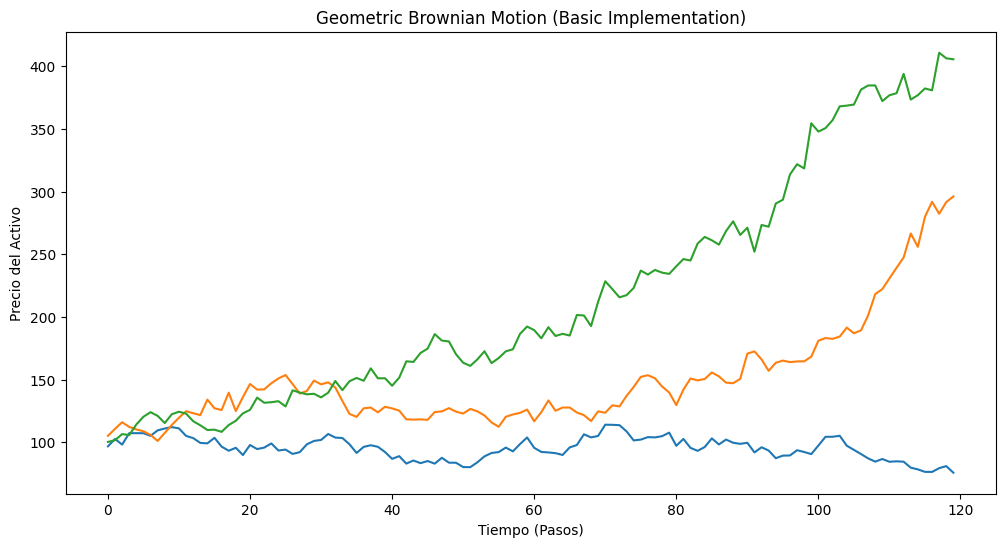

In [28]:
# Generar 3 escenarios de precios para 10 años
p = gbm0(n_years=10, n_scenarios=3, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0)

# Mostrar las primeras filas de los datos generados
print(p.head())

# Graficar los resultados
p.plot(figsize=(12, 6), legend=False)
plt.title("Geometric Brownian Motion (Basic Implementation)")
plt.xlabel("Tiempo (Pasos)")
plt.ylabel("Precio del Activo")
plt.show()


##### **E9. Simulate 100 scenarios for 10 years.**

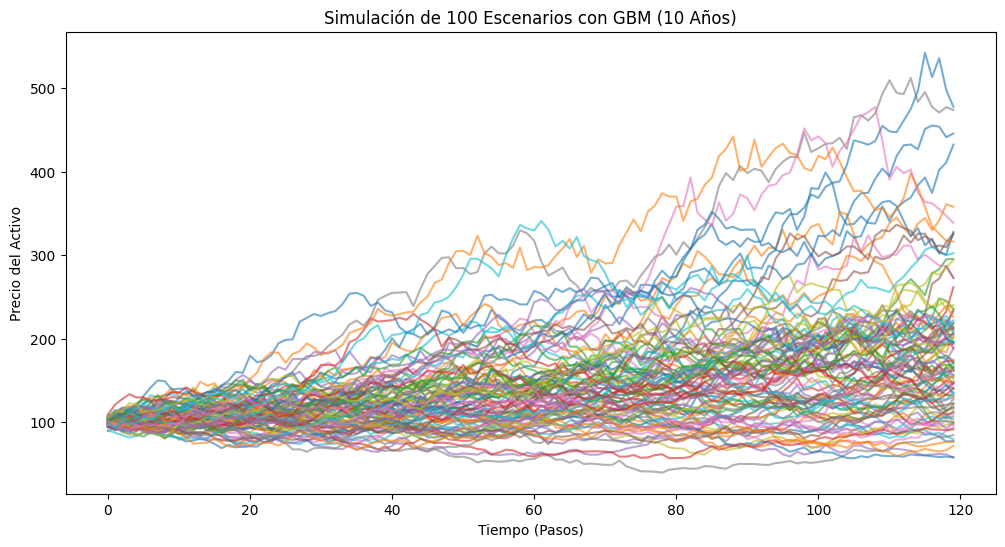

In [29]:
# Simular 100 escenarios de precios para 10 años utilizando GBM
simulated_prices_100 = gbm0(n_years=10, n_scenarios=100, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0)

# Graficar los resultados
simulated_prices_100.plot(figsize=(12, 6), legend=False, alpha=0.6)
plt.title("Simulación de 100 Escenarios con GBM (10 Años)")
plt.xlabel("Tiempo (Pasos)")
plt.ylabel("Precio del Activo")
plt.show()


The following section is optional and not neccesary for the essential results of the following section, however, you are encouraged to solve it.

##### Optimized Formulation and Interactive Simulation (OPTIONAL)

In our optimized GBM function, we calculate returns directly in a way that avoids explicit loops. We generate values for \( $1 + r_i$ \) using:

$$
1 + r_i = 1 + \mu \cdot \Delta t + \sigma \cdot \sqrt{\Delta t} \cdot \xi_i
$$

This can be generated directly using:

$$
\text{rets_plus_1} = \text{np.random.normal}(\text{loc}=1 + \mu \cdot \Delta t, \text{scale}=\sigma \cdot \sqrt{\Delta t}, \text{size}=(\text{n_steps}, \text{n_scenarios}))
$$

Here:
- **loc** (mean) is set to \( $1 + \mu \cdot \Delta t$ \),
- **scale** (standard deviation) is set to \( $\sigma \cdot \sqrt{\Delta t}$ \).

The stock prices \( $S_t$ \) for each scenario are then computed as the cumulative product of these adjusted returns:

$$
S_t = S_0 \cdot \prod_{i=1}^{t} \text{rets_plus_1}_i
$$

This approach efficiently models the evolution of stock prices over time, capturing both the drift (expected return) and the volatility.

The next function, gbm, is an optimized version of gbm0, which uses vectorization for faster computation. Instead of calculating returns and adding 1 to each element in a loop, it directly generates the adjusted return values.

In [30]:
# Implementar la función optimizada GBM
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Optimized Evolution of a Stock Price using GBM
    """
    dt = 1 / steps_per_year  # Tamaño del paso
    n_steps = int(n_years * steps_per_year)  # Número total de pasos
    # Generar valores ajustados de retornos (1 + ri)
    rets_plus_1 = np.random.normal(loc=1 + mu * dt, scale=sigma * np.sqrt(dt), size=(n_steps, n_scenarios))
    # Calcular los precios como el producto acumulado
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

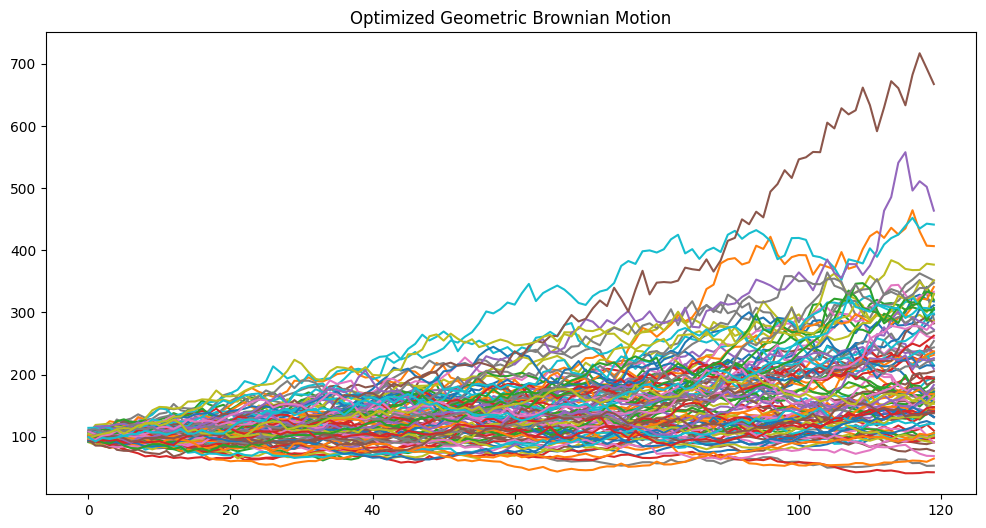

In [31]:
# Apply the optimized GBM function
p_optimized = gbm(n_years=10, n_scenarios=100)

# Plot the optimized results
p_optimized.plot(figsize=(12, 6), legend=False)
plt.title("Optimized Geometric Brownian Motion")
plt.show()

If the improvement is not clear, run the following cell to compute the time it takes to run each GBM implementation.

In [32]:
# Compare performance
%timeit gbm0(n_years=5, n_scenarios=1000)
%timeit gbm(n_years=5, n_scenarios=1000)

3.61 ms ± 218 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.92 ms ± 80.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The last refinement ensures that the simulated stock prices start exactly at the initial value s_0 for all scenarios by setting the first row to 1 in rets_plus_1.

In [33]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Final Evolution of a Stock Price using GBM, ensuring initial value starts at s_0.
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc=1 + mu * dt, scale=sigma * np.sqrt(dt), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1  # Start all scenarios at s_0
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

<Axes: >

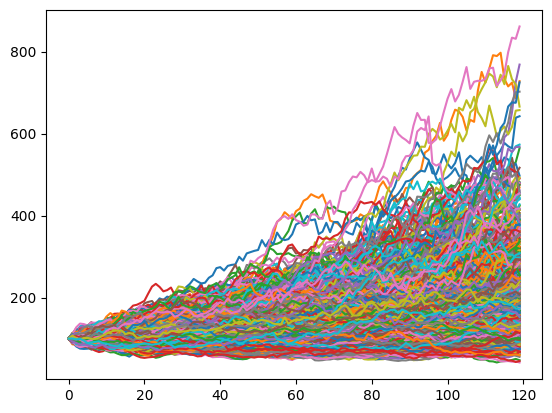

In [34]:
gbm(n_years=10,n_scenarios=1000).plot(legend=False)

Now, we can use GBM to simulate assets and then apply CPPI.

##### **E10. Define a function show_cppi to run a Monte Carlo simulation of the CPPI strategy. This function uses simulated risky asset returns generated by the gbm function assuming an initial investment of 100. For the simulation, use n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0.0, riskfree_rate=0.03**

In [35]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0.0, riskfree_rate=0.03, y_max=100):
    """
    Realiza una simulación Monte Carlo de la estrategia CPPI e incluye un histograma de la riqueza terminal.
    """
    start = 100  # Valor inicial de la inversión
    n_years = 10
    steps_per_year = 12

    # Simulación de precios usando GBM
    sim_prices = gbm(n_years=n_years, n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=start, steps_per_year=steps_per_year)
    risky_r = sim_prices.pct_change().dropna()  # Convertir precios a retornos porcentuales

    # Ejecutar CPPI
    btr = run_cppi(risky_r, riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["Wealth"]

    # Calcular estadísticas de la riqueza terminal
    y_max = wealth.values.max() * y_max / 100
    terminal_wealth = wealth.iloc[-1]  # Última fila para la riqueza terminal

    # Configurar la figura para los gráficos
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios': [3, 2]}, figsize=(24, 9))
    plt.subplots_adjust(wspace=0.0)

    # Gráfica de la evolución de la riqueza
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")  # Gráfico de CPPI
    wealth_ax.axhline(y=start, ls=":", color="black")  # Línea inicial de referencia
    wealth_ax.axhline(y=start * floor, ls="--", color="red")  # Línea del piso
    wealth_ax.set_ylim(top=y_max)
    wealth_ax.set_title("Evolución de la Riqueza con CPPI")
    wealth_ax.set_xlabel("Tiempo")
    wealth_ax.set_ylabel("Valor del Portafolio (USD)")

    # Histograma de la riqueza terminal
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")  # Línea inicial de referencia
    hist_ax.set_title("Distribución de la Riqueza Terminal")
    hist_ax.set_xlabel("Frecuencia")

    plt.show()


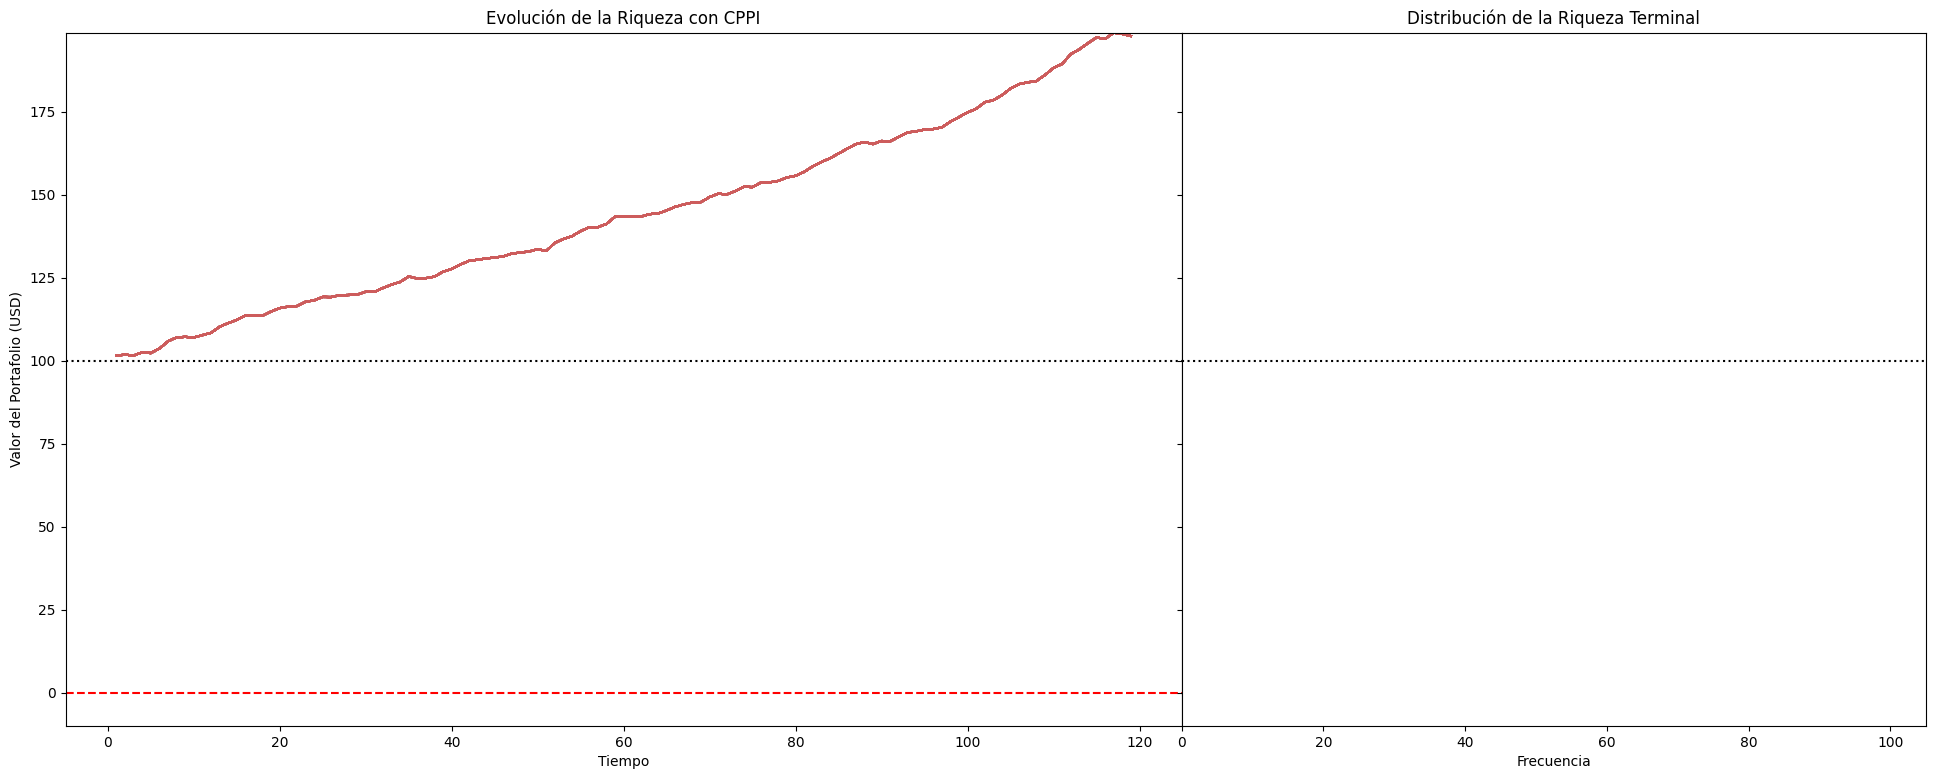

In [36]:
# Ejecutar la simulación con los parámetros definidos
show_cppi(n_scenarios=100, mu=0.07, sigma=0.15, m=3, floor=0.0, riskfree_rate=0.03, y_max=100)


##### **E11. Enhance show_cppi by including a histogram of terminal wealth at the end of the simulation. This histogram shows the distribution of outcomes across different scenarios. Also, include  additional statistics, such as mean, median, the probability of falling below the floor, and expected shortfall if the floor is violated.**

In [37]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0.0, riskfree_rate=0.03, y_max=100):
    """
    Plots the result of a Monte Carlo Simulation of CPPI, including terminal wealth stats.
    """
    # Parámetros iniciales
    start = 100  # Valor inicial de la inversión
    sim_rets = gbm(n_years=10, n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=start)  # Simulaciones GBM
    risky_r = pd.DataFrame(sim_rets.pct_change().dropna())  # Calcular rendimientos porcentuales

    # Ejecutar CPPI
    btr = run_cppi(risky_r=risky_r, m=m, start=start, floor=floor, riskfree_rate=riskfree_rate)
    wealth = btr["Wealth"]
    terminal_wealth = wealth.iloc[-1]  # Últimos valores de la riqueza

    # Calcular estadísticas de riqueza terminal
    y_max = wealth.values.max() * y_max / 100  # Límite superior de la gráfica
    tw_mean = terminal_wealth.mean()  # Promedio de riqueza terminal
    tw_median = terminal_wealth.median()  # Mediana de riqueza terminal
    failure_mask = terminal_wealth < start * floor  # Máscara para identificar violaciones al piso
    n_failures = failure_mask.sum()  # Número de violaciones
    p_fail = n_failures / n_scenarios  # Probabilidad de violar el piso
    e_shortfall = (terminal_wealth - start * floor)[failure_mask].mean() if n_failures > 0 else 0.0  # Pérdida esperada

    # Configurar gráficos
    fig, (wealth_ax, hist_ax) = plt.subplots(
        nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios': [3, 2]}, figsize=(24, 9)
    )
    plt.subplots_adjust(wspace=0.0)

    # Gráfica de evolución de riqueza
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black", label="Initial Investment")
    wealth_ax.axhline(y=start * floor, ls="--", color="red", label="Floor")
    wealth_ax.set_ylim(top=y_max)
    wealth_ax.set_title("Evolución de la Riqueza en CPPI", fontsize=20)
    wealth_ax.set_ylabel("Valor de Riqueza")
    wealth_ax.set_xlabel("Tiempo")
    wealth_ax.legend()

    # Histograma de riqueza terminal
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    hist_ax.set_title("Distribución de Riqueza Terminal", fontsize=20)
    hist_ax.set_xlabel("Frecuencia")

    # Anotar estadísticas
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(0.7, 0.9), xycoords='axes fraction', fontsize=18)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(0.7, 0.85), xycoords='axes fraction', fontsize=18)
    if floor > 0.01:
        hist_ax.axhline(y=start * floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(
            f"Violations: {n_failures} ({p_fail * 100:.2f}%)\nE(shortfall)=${e_shortfall:.2f}",
            xy=(0.7, 0.7), xycoords="axes fraction", fontsize=18
        )

    plt.show()


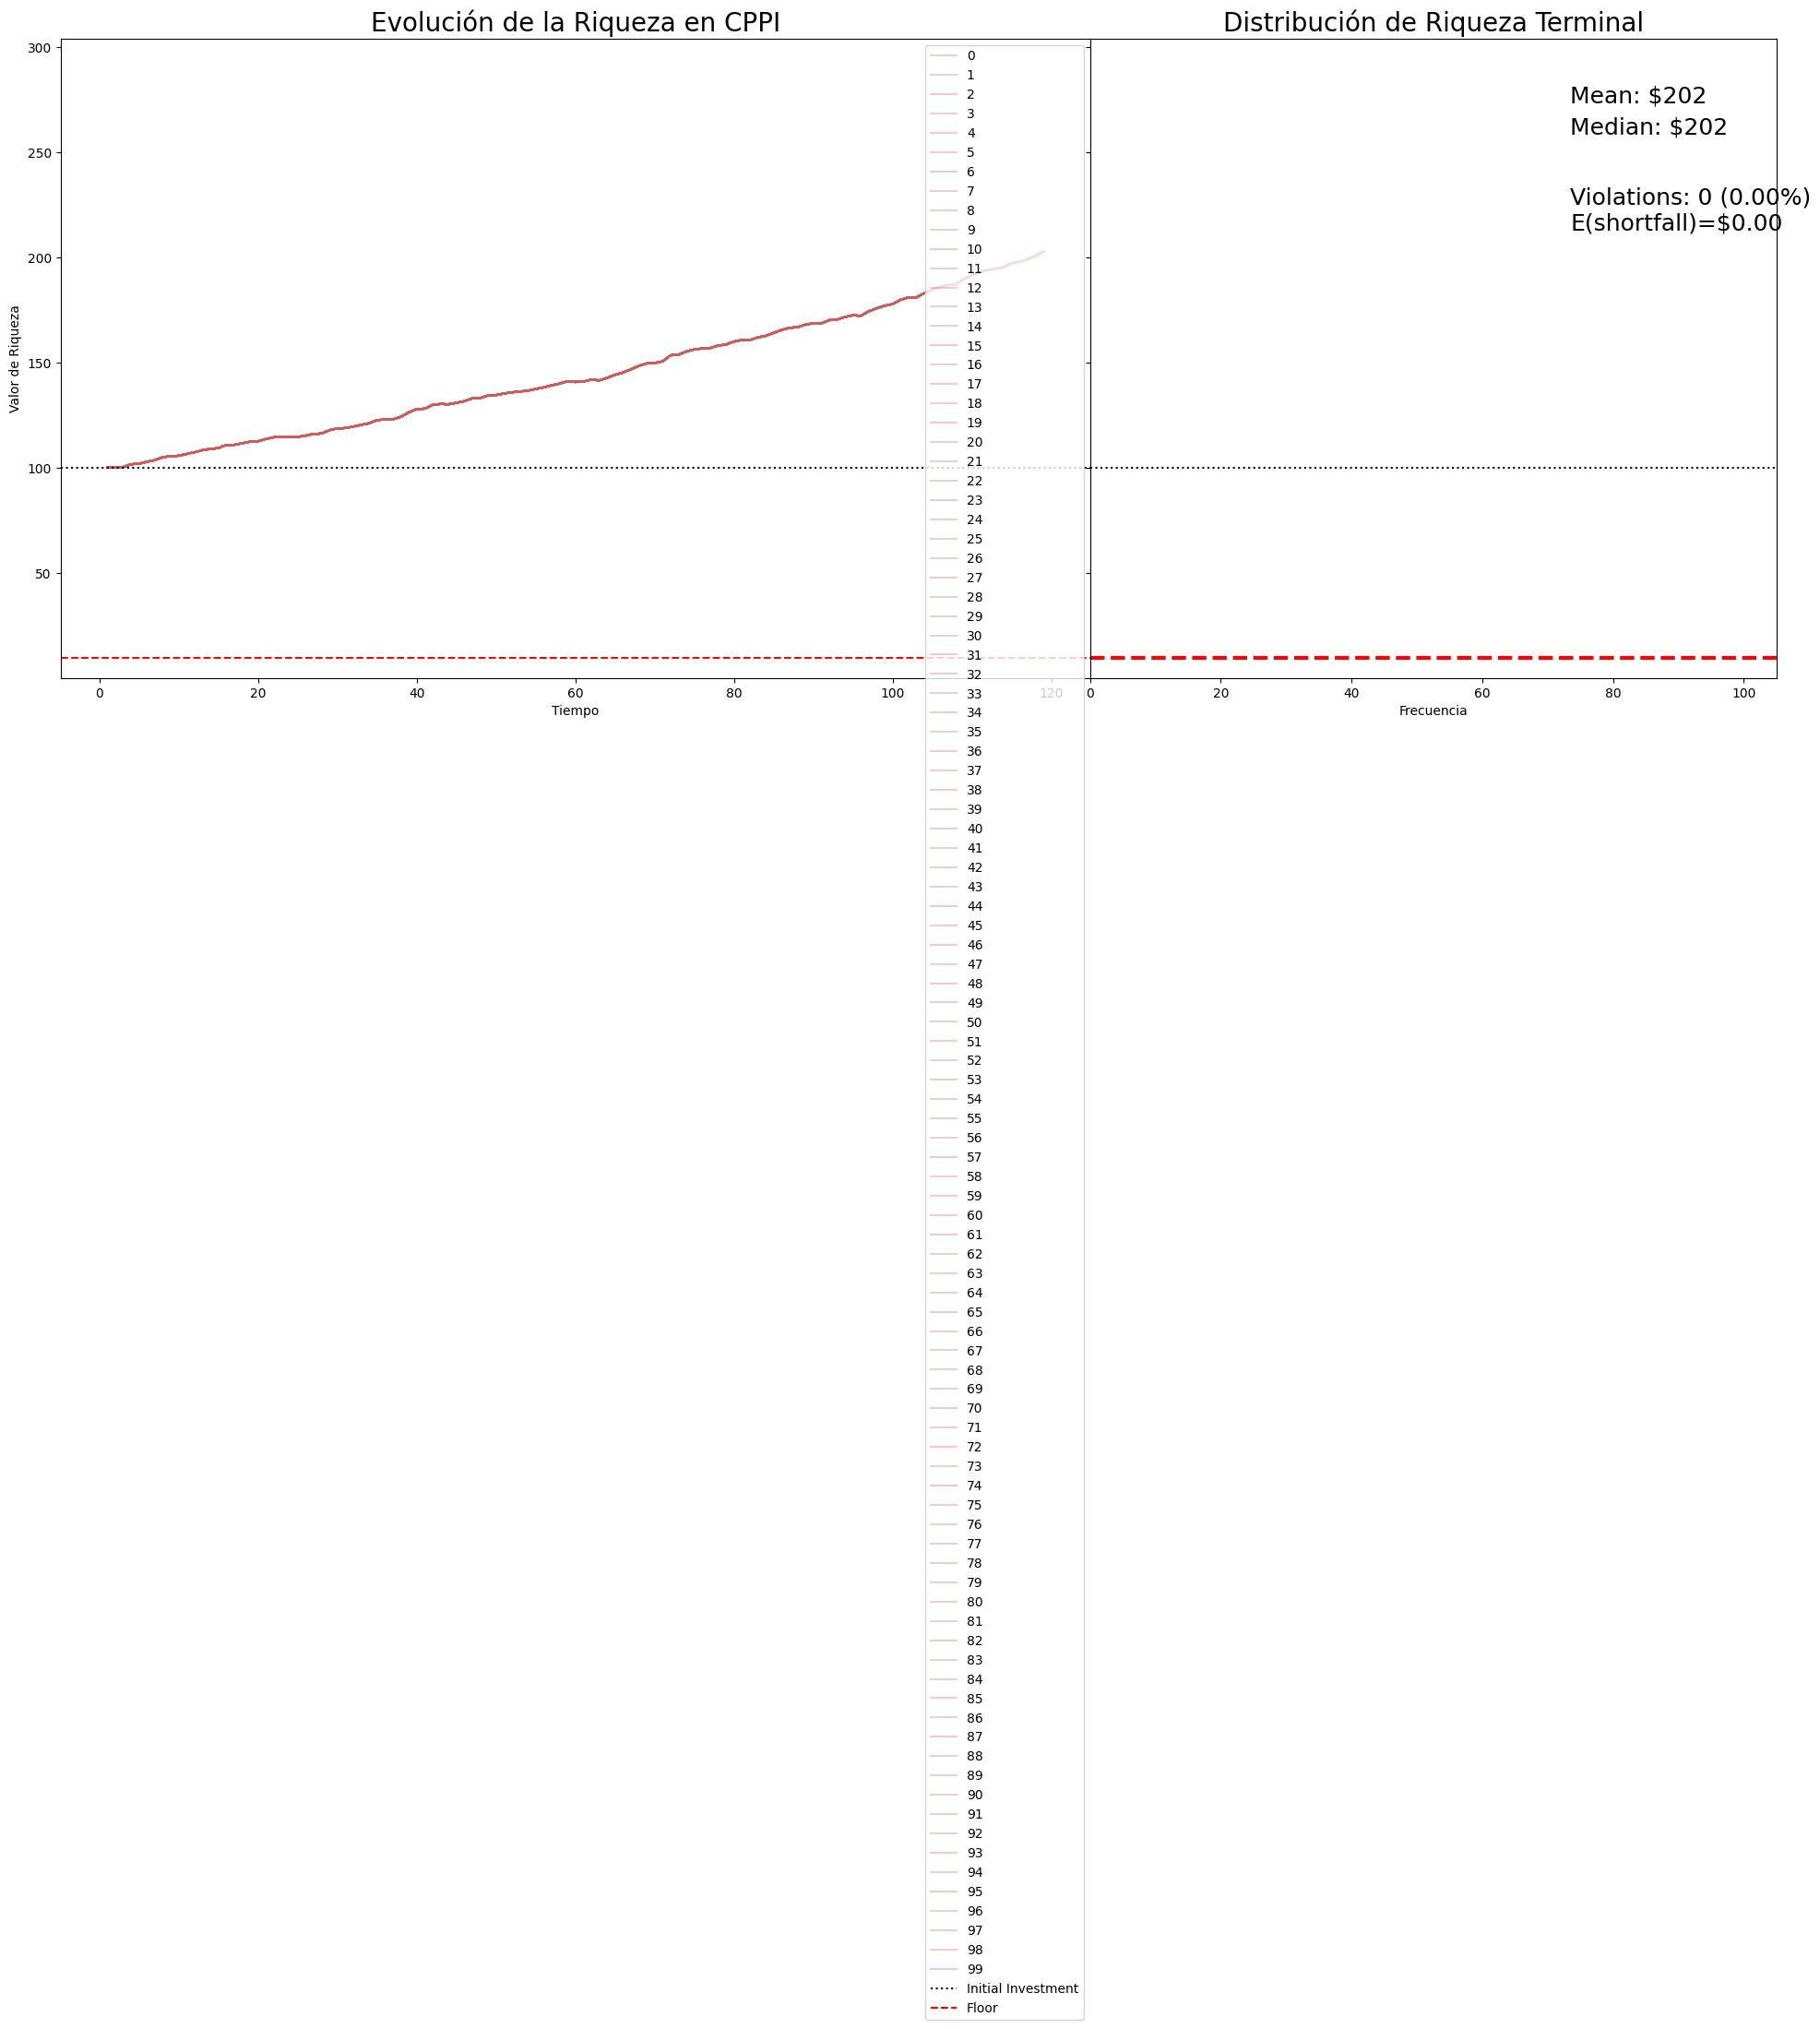

In [38]:
# Ejecutar simulación mejorada de CPPI
show_cppi(n_scenarios=100, mu=0.07, sigma=0.15, m=3, floor=0.1, riskfree_rate=0.03, y_max=150)


##### **R2. You are going to simulate returns and apply CPPI. First, explain how GBM is used and computed, and how it can be used into CPPI. Then, perform 5 different simulations of returns using GBM with different configurations for 1000 scenarios for periods of 40 years. Apply CPPI to the simulated returns. Plot a histogram of the terminal wealth at the end of the simulation. Also, include additional statistics, such as mean, median, the probability of falling below the floor (which is computed from the times the floor was violated during the simulations), and the expected shortfall if the floor is violated. Analyze the results and give some key conclusions about GBM usage for Portfolio Management and CPPI.**

## 3 Present Value of Liabilities and Funding Ratio

One of the main porpuses of investing is not just to get richier or grow the assets, but also to hedge the money you need to do the thing you want in the future.

The liability perspective of investment is an approach where the primary goal of the portfolio is to match or exceed the returns required to meet future liabilities rather than focusing solely on maximizing returns. This allows for Risk Management with Liabilities in mind.

One way to see at this from personal investments is to consider future money objectives as a debts, i.e. liabilities. Thus, as you may remember from financial mathematics, we can valuate in the present the money that we would need in the future to cover our liability. Therefore, the first step is to calculate the present value (PV) of a set of future liabilities and determine the funding ratio, which compares available assets to these liabilities.

For institutional investors, the funding ratio and liability perspective of investment are key concepts that introduce the Liability-Driven Investment (LDI) strategy, which is often used by institutions like pension funds and insurance companies to manage portfolios with a focus on meeting future financial obligations. By focusing on the funding ratio and liability alignment, they ensure that the portfolio is not only growing but also capable of fulfilling its primary purpose—meeting all future financial commitments.



---

**Discount Factor**

The price of a pure discount bond that pays $1 at time t, given an annual interest rate r, is calculated using the discount factor:

$$
B(t) = \frac{1}{(1 + r)^t}
$$

where:
- t is the time in years,
- r is the annual interest rate.

---

**Present Value of Liabilities**

The present value PV(L) of a set of liabilities is given by the sum of each liability $L_i$ due at time $t_i$, discounted by $B(t_i)$:

$$
PV(L) = \sum_{i=1}^k B(t_i) \cdot L_i
$$

where:
- $t_i$ is the time at which each liability is due,
- $L_i$ is the amount of the liability at $t_i$,
- r is the annual interest rate.

If the yield curve is flat (a single interest rate r applies for all times), this formula calculates the total present value of all liabilities.

---

**Funding Ratio**

The funding ratio compares available assets to the present value of liabilities. It is calculated as:

$$
\text{Funding Ratio} = \frac{\text{Assets}}{PV(L)}
$$

where:
- **Assets** is the amount of money available today to fund future liabilities,
- PV(L) is the present value of the liabilities.

A funding ratio greater than 1 indicates overfunding, while a value below 1 indicates underfunding.

---

**Analysis of Interest Rate Impact**

To analyze the impact of interest rate changes on the funding ratio:
- **Increasing the Interest Rate**: Lowers the present value of liabilities, as future cash flows are discounted more heavily, potentially increasing the funding ratio.
- **Decreasing the Interest Rate**: Raises the present value of liabilities, making the funding ratio worse if assets remain constant.

##### **E12. Implement fucntions to compute the the price of a pure discount bond, the PV of liabilities, and the funding ratio**

In [39]:
def discount(t, r):
    """
    Compute the price of a pure discount bond that pays $1 at time t,
    given an interest rate r.
    """
    return 1 / ((1 + r) ** t)

def pv_liabilities(liabilities, times, r):
    """
    Compute the present value of a set of liabilities.
    liabilities: List of liabilities (amounts due at each time)
    times: List of times (in years) at which liabilities are due
    r: Annual interest rate
    """
    # Ensure liabilities and times are the same length
    if len(liabilities) != len(times):
        raise ValueError("Liabilities and times must have the same length.")

    # Calculate PV(L) as the sum of discounted liabilities
    pv = sum(discount(t, r) * L for t, L in zip(times, liabilities))
    return pv

def funding_ratio(assets, liabilities, times, r):
    """
    Compute the funding ratio, given assets and liabilities.
    assets: Current amount of money available
    liabilities: List of liabilities
    times: List of times (in years) at which liabilities are due
    r: Annual interest rate
    """
    pv_l = pv_liabilities(liabilities, times, r)
    return assets / pv_l


To check the discount factor for a payment due in 10 years at a 3% interest rate

In [40]:
discount(10, 0.03) #returns 0.7440939148967249

0.7440939148967249

In [41]:
def pv(liabilities, r):
    """
    Computes the present value of a set of liabilities.
    `liabilities` is indexed by the time, and values are the amounts.
    Returns the present value of the set.
    """
    # Calcular el valor presente de cada pasivo
    pv_values = liabilities.index.map(lambda t: liabilities.loc[t] / (1 + r) ** t)

    # Convertir los resultados a un array y sumar
    return sum(pv_values)


Define a set of liabilities and calculate their present value with a 3% discount rate.

In [42]:
# Definir los pasivos
liabilities = pd.Series(data=[1, 1.5, 2, 2.5], index=[3, 3.5, 4, 4.5])

# Calcular el valor presente
present_value = pv(liabilities, 0.03)
print(present_value)  # Debería devolver 6.233320315080045


6.233320315080044


In [43]:
def funding_ratio(assets, liabilities, r):
    """
    Computes the funding ratio given assets, liabilities, and interest rate.
    `assets`: The current value of the assets.
    `liabilities`: A pandas Series, where the index represents the time of payment and the values are the amounts.
    `r`: The discount rate (annual interest rate).
    Returns the funding ratio as a float.
    """
    # Calcular el valor presente de los pasivos
    pv_liabilities = pv(liabilities, r)

    # Calcular el ratio de financiación
    return assets / pv_liabilities


To calculate the funding ratio with $5 in assets and a 3% interest rate

In [44]:
funding_ratio(5, liabilities, 0.03)  # Returns 0.8021407126958777

0.8021407126958778

To observe the effect of interest rate changes on the funding ratio, we can recalculate it with different rates. A drop in the interest rate generally lowers the funding ratio because liabilities’ present value increases when discounted at a lower rate.

In [45]:
# Calculate funding ratio with interest rate of 2%
funding_ratio(5, liabilities, 0.02)  # Returns 0.7720304366941648

0.7720304366941647



##### **E13. Vary the interest rate and number of assets to see the effect**

You can see how different levels of assets and interest rates impact the funding ratio.

- Increasing Assets: Adding more assets improves the funding ratio.
- Improving the Rate of Return: A higher interest rate decreases the present value of liabilities, thus improving the funding ratio.
These options provide strategies to ensure future liabilities can be met.

As you may remember from financial mathematics, the most important element for liabilities valuation is the interest rate. In previous courses you may have studied liabilities with fixed interest rates, however, interest rate also vary. Therefore, for valuating future liabilities it is important to model interest rate movements. We already know how to simulate movements in returs, and interest rates are similar (from a debt owner perspective). However, we can go further and extend our study to another model that is extremely popular to model interest rates.

## 4 CIR Model for Interest Rates


The Cox-Ingersoll-Ross model is used to model the dynamics of interest rates, and is and extension of the popular Vasicek Model to prevent negative interest rates.

We have seen that the CIR is a mean reversion model that put the changes on interest rates as a function of how
far you are at time t from the long term mean, summed to some shock which is a function of the volatility times
the square root of the rate at time t (the Vasicek Model is the same without this square root), this square root
ensures that if the rate goes to zero also does the shock.


The dynamics of the interest rate \( $r_t$ \) under the CIR model are described by:

$$
dr_t = a(b - r_t) \, dt + \sigma \sqrt{r_t} \, dW_t
$$

where:
- \( $r_t$ \) is the interest rate at time \( t \),
- \( a \) is the speed of mean reversion,
- \( b \) is the long-term mean level of the rate,
- \( \sigma \) is the volatility,
- \( $dW_t$ \) is a Wiener process (random shock).

Again,the square root term \( $\sqrt{r_t}$ \) ensures that the interest rate does not become negative.

---

**Conversion Between Force of Interest and Annualized Rate**

We use the following conversions between the force of interest and the annualized rate:

- **Force to Annualized Rate**:
  $$ \text{force_to_ann}(r) = e^r - 1 $$

- **Annualized Rate to Force**:
  $$ \text{ann_to_force}(r) = \ln(1 + r) $$

These functions allow us to switch between different representations of the interest rate in the model.


---


##### **E14. Implement the conversions from and to force of interest and the CIR model to simulate interest rates movements.**


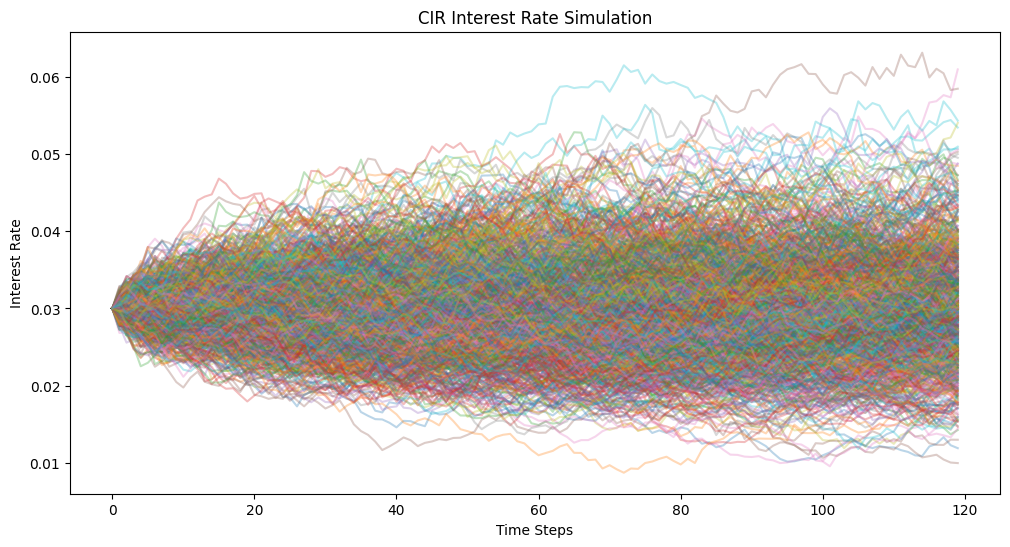

In [46]:
def force_to_ann(r):
    """
    Converts force of interest to an annualized rate.
    """
    return np.exp(r) - 1

def ann_to_force(r):
    """
    Converts an annualized rate to the force of interest.
    """
    return np.log(1 + r)

def cir(n_years=10, n_scenarios=1000, a=0.05, b=0.03, sigma=0.02, steps_per_year=12, r_0=0.03):
    """
    Simulates interest rate movements using the CIR model.
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    rates = np.zeros((n_steps, n_scenarios))
    rates[0] = r_0

    for step in range(1, n_steps):
        rt = rates[step - 1]
        dW = np.random.normal(0, np.sqrt(dt), size=n_scenarios)  # Wiener process
        dr = a * (b - rt) * dt + sigma * np.sqrt(np.maximum(rt, 0)) * dW
        rates[step] = rt + dr

    return pd.DataFrame(rates)

# Ejemplo de uso
n_years = 10
n_scenarios = 1000
a = 0.1  # Velocidad de reversión a la media
b = 0.03  # Nivel promedio a largo plazo
sigma = 0.02  # Volatilidad
r_0 = 0.03  # Tasa inicial

# Simulación de tasas de interés con el modelo CIR
simulated_rates = cir(n_years=n_years, n_scenarios=n_scenarios, a=a, b=b, sigma=sigma, r_0=r_0)
simulated_rates.plot(figsize=(12, 6), legend=False, alpha=0.3, title="CIR Interest Rate Simulation")
plt.xlabel("Time Steps")
plt.ylabel("Interest Rate")
plt.show()


The cir function implements the Cox-Ingersoll-Ross (CIR) model, which simulates the evolution of interest rates over time.

In [47]:
def cir(n_years=10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    """
    Implements the CIR model for simulating interest rate evolution over time.
    """
    if r_0 is None:  # Si no se especifica r_0, usa b como tasa inicial
        r_0 = b

    # Convertir r_0 a fuerza de interés
    r_0 = ann_to_force(r_0)
    dt = 1 / steps_per_year  # Tamaño del paso (intervalo de tiempo)
    num_steps = int(n_years * steps_per_year) + 1  # Número total de pasos

    # Simular choques normales estándar (ruido aleatorio)
    shock = np.random.normal(0, scale=np.sqrt(dt), size=(num_steps, n_scenarios))
    rates = np.empty_like(shock)  # Matriz para almacenar las tasas simuladas
    rates[0] = r_0  # Establecer la tasa inicial

    for step in range(1, num_steps):
        r_t = rates[step - 1]  # Tasa en el paso anterior
        # Simular los movimientos de las tasas usando la ecuación del modelo CIR
        d_r_t = a * (b - r_t) * dt + sigma * np.sqrt(np.maximum(r_t, 0)) * shock[step]
        rates[step] = np.abs(r_t + d_r_t)  # Asegurar que las tasas sean no negativas

    # Convertir las tasas de fuerza de interés a tasas anualizadas
    return pd.DataFrame(data=force_to_ann(rates), index=range(num_steps))


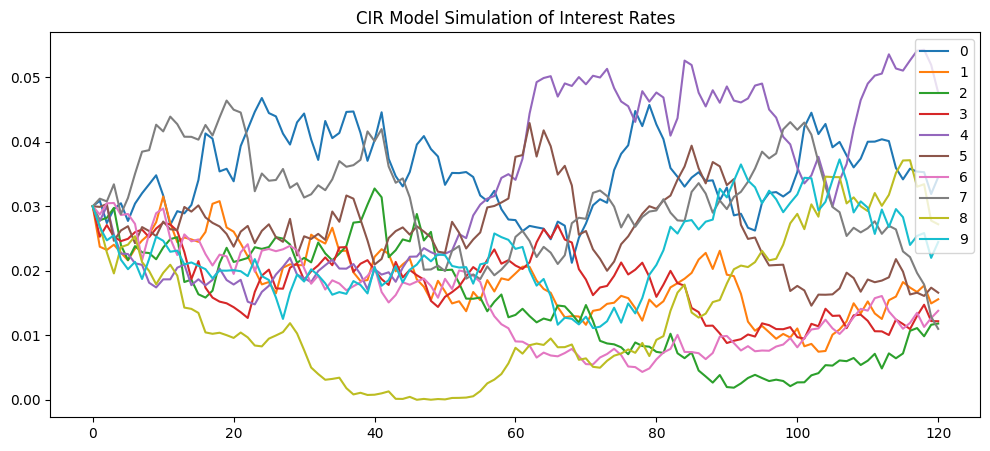

In [48]:
#Apply the CIR model
cir(n_scenarios=10).plot(figsize=(12, 5), title="CIR Model Simulation of Interest Rates")
plt.show()


The model can also be used to generate the movement of bond prices for a zero coupon bond that are implied
by the generated interest rate.

**Zero-Coupon Bond Pricing with the CIR Model**

The CIR model also allows us to price a zero-coupon bond (ZCB) that matures at time T, given an initial rate r. The ZCB price P(t, T) is given by:

$$
P(t, T) = A(t, T) \cdot e^{-B(t, T) \cdot r_t}
$$

where:
- A(t, T) and B(t, T) are defined by the CIR parameters as follows:

  1. Compute h as:
     $$
     h = \sqrt{a^2 + 2 \sigma^2}
     $$

  2. Compute B(t, T) as:
     $$
     B(t, T) = \frac{2 \cdot (e^{h \tau} - 1)}{2h + (a + h) \cdot (e^{h \tau} - 1)}
     $$

  3. Compute A(t, T) as:
     $$
     A(t, T) = \left( \frac{2h \cdot e^{(h + a) \cdot \tau / 2}}{2h + (a + h) \cdot (e^{h \tau} - 1)} \right)^{\frac{2ab}{\sigma^2}}
     $$

where \( $\tau = T - t $\) represents the time to maturity.

---


##### **E15. Extend the CIR model to valuate ZC bonds.**


In [49]:
import math
import numpy as np
import pandas as pd

def force_to_ann(r):
    """
    Converts force of interest to an annualized rate.
    """
    return np.exp(r) - 1

def ann_to_force(r):
    """
    Converts an annualized rate to the force of interest.
    """
    return np.log(1 + r)

def cir(n_years=10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    """
    Implements the CIR model and Zero-Coupon Bond Pricing.
    """
    if r_0 is None:  # Default to long-term mean rate if not provided
        r_0 = b
    r_0 = ann_to_force(r_0)  # Convert to force of interest
    dt = 1 / steps_per_year
    num_steps = int(n_years * steps_per_year) + 1
    shock = np.random.normal(loc=0, scale=np.sqrt(dt), size=(num_steps, n_scenarios))
    rates = np.empty_like(shock)
    rates[0] = r_0

    h = math.sqrt(a ** 2 + 2 * sigma ** 2)  # Calculate h for the CIR model
    prices = np.empty_like(shock)

    def price(ttm, r):
        """
        Computes the price of a Zero-Coupon Bond using the CIR model.
        """
        # Compute A(t, T)
        _A = ((2 * h * np.exp((h + a) * ttm / 2)) /
              (2 * h + (h + a) * (np.exp(h * ttm) - 1))) ** (2 * a * b / sigma ** 2)

        # Compute B(t, T)
        _B = (2 * (np.exp(h * ttm) - 1)) / (2 * h + (h + a) * (np.exp(h * ttm) - 1))

        # Return the bond price
        return _A * np.exp(-_B * r)

    # Initialize the first step prices
    prices[0] = price(n_years, rates[0])

    for step in range(1, num_steps):
        r_t = rates[step - 1]
        d_r_t = a * (b - r_t) * dt + sigma * np.sqrt(r_t) * shock[step]  # CIR model
        rates[step] = abs(r_t + d_r_t)  # Ensure non-negative rates
        prices[step] = price(n_years - step * dt, rates[step])  # Compute ZCB prices

    rates = pd.DataFrame(data=force_to_ann(rates), index=range(num_steps))  # Convert rates back to annualized
    prices = pd.DataFrame(data=prices, index=range(num_steps))  # Bond prices
    return rates, prices


<Axes: >

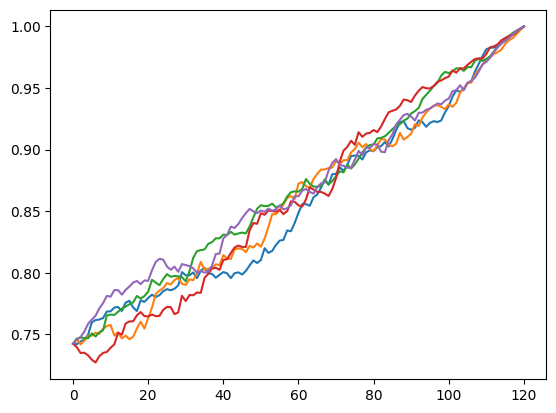

In [50]:
#Apply the cir model
cir(r_0=0.03,a=0.5,b=0.03,sigma=0.05,n_scenarios=5)[1].plot(legend=False)

We talked in class about convergence of prices for bonds, maybe the last plot helps you to see this.

##### **R3. Explain the CIR model and its applications. Use it to simulate 5 interest rates with 10 scenarios each and different configurations that allow you to see how it behaves under different scenarios. Be wise when choosing your configurations. Analyze the results and provide insights about interest rate modelling.**

In class, we also talked about the risk perspective of using cash vs bonds to fund liabilities.

The following compares zc bonds to cash. Assume that liabilities are the bond prices,i.e. we are using bond prices to model liabilities as they are almost the same from a computation and mathematical finance perspective.




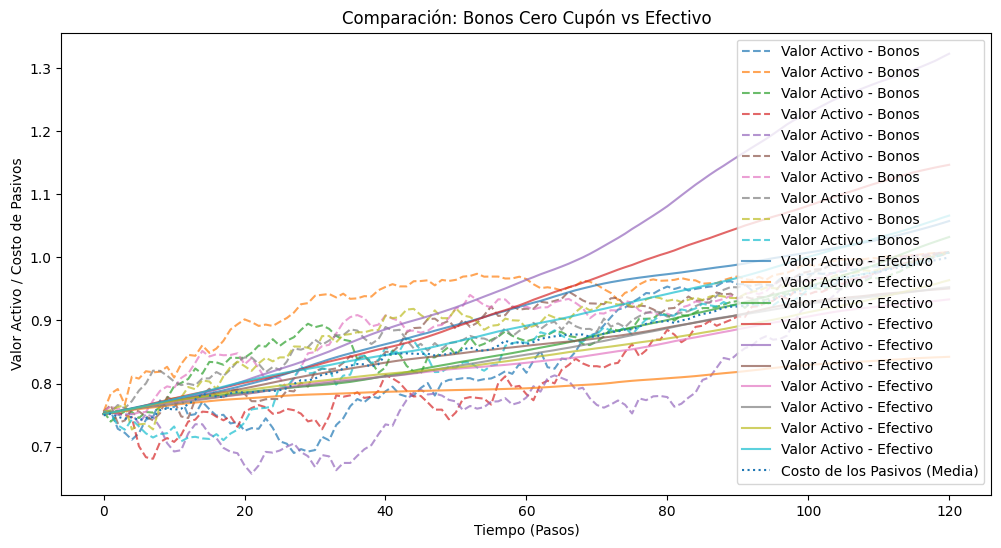

In [51]:
# Simular para 10 años
a_0 = 0.75  # efectivo disponible, 0.75 de un millón
n_years = 10
r_0 = 0.03  # tasa inicial
b = 0.03    # tasa a largo plazo
a = 0.05    # velocidad de reversión
sigma = 0.05  # volatilidad

# Generar tasas de interés y precios de bonos cero cupón
rates, bond_prices = cir(r_0=r_0, b=b, n_years=n_years, n_scenarios=10, a=a, sigma=sigma)

# Suponer que los pasivos son los precios de los bonos
liabilities = bond_prices  # El costo de los pasivos cambia con las tasas de interés

# Calcular el valor presente de un bono cero cupón (zc bond)
zc_bond = pd.Series(data=[1], index=[n_years])  # Bono que paga $1 en 10 años
zc_0 = pv(zc_bond, r_0)  # Valor presente con tasa inicial de 0.03

# ¿Cuántos bonos podemos comprar con el efectivo disponible?
n_bonds = a_0 / zc_0  # Cantidad de bonos que se pueden adquirir

# Valor del activo suponiendo que se compran bonos
av_zc_bonds = n_bonds * bond_prices  # Valor de los bonos adquiridos según los precios simulados

# Valor del activo invirtiendo en efectivo
av_cash = a_0 * (rates / 12 + 1).cumprod()  # Valor acumulado si se invierte en efectivo

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(av_zc_bonds, label="Valor Activo - Bonos", linestyle="--", alpha=0.7)
plt.plot(av_cash, label="Valor Activo - Efectivo", alpha=0.7)
plt.plot(liabilities.mean(axis=1), label="Costo de los Pasivos (Media)", linestyle=":")
plt.title("Comparación: Bonos Cero Cupón vs Efectivo")
plt.xlabel("Tiempo (Pasos)")
plt.ylabel("Valor Activo / Costo de Pasivos")
plt.legend()
plt.show()


<Axes: >

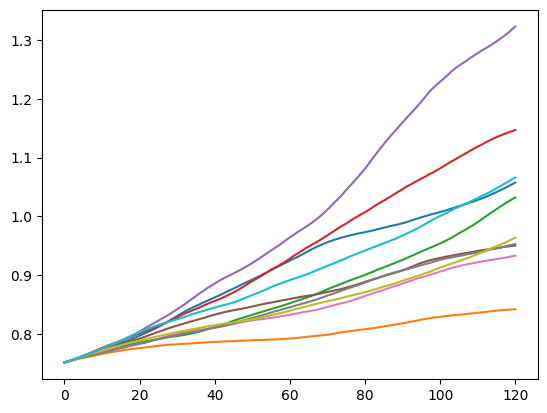

In [52]:
av_cash.plot(legend=False)

Notice we have good and not so good situations. So if you we're at a pension fund and you put all the money in the safe option, and you don't make the million (liability) then your return to the persons in the pension wouldn't be enough, you wouldn't have money to pay.

<Axes: >

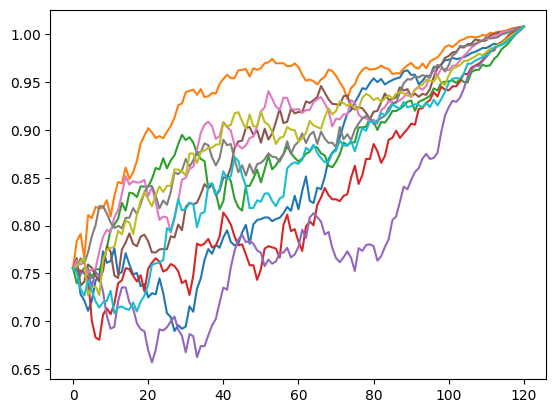

In [53]:
av_zc_bonds.plot(legend=False)

Notice that the return at the end of the period was one million dolars. You could have two looks at this. You could say the bonds were not safe, or that they gave you a safe reward.

<Axes: title={'center': 'Returns of Funding Ratio with Cash (10 scenarios)'}>

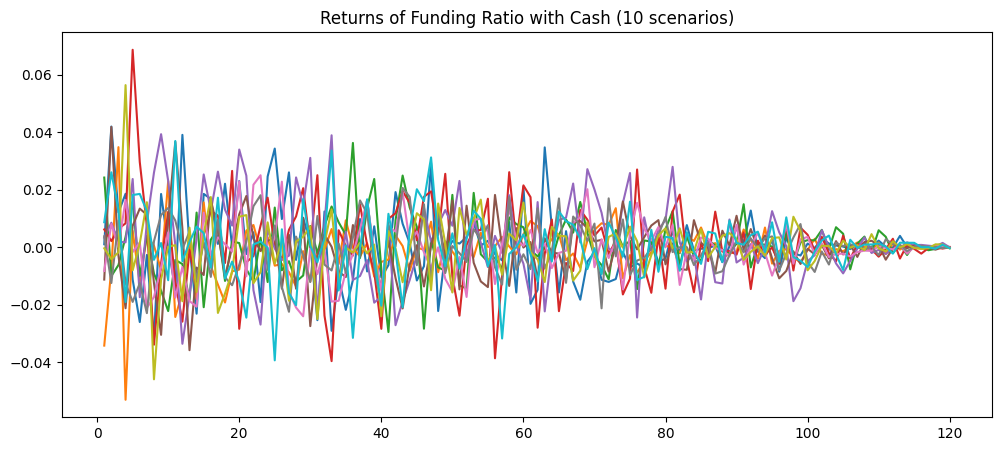

In [54]:
(av_cash/liabilities).pct_change().plot(title='Returns of Funding Ratio with Cash (10 scenarios)',legend=False,figsize=(12,5) )

As we said in class it's very risky.

<Axes: title={'center': 'Returns of Funding Ratio with Bonds (10 scenarios)'}>

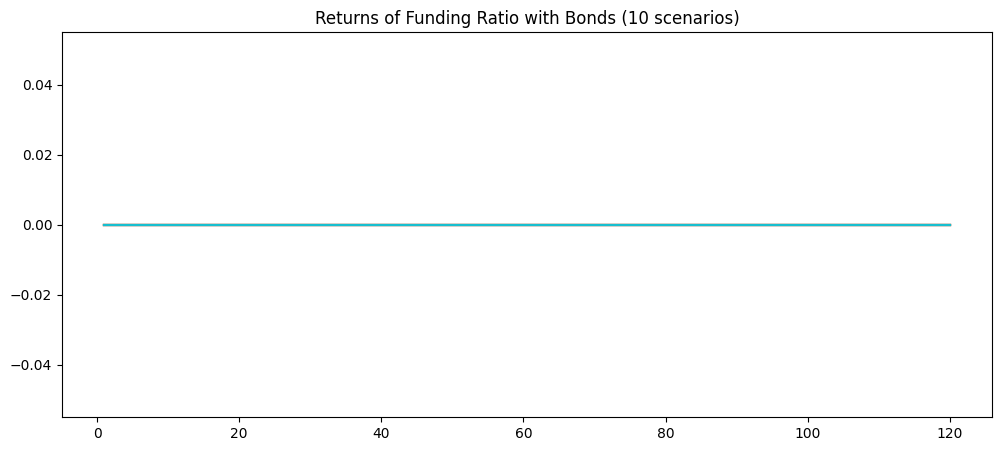

In [55]:
(av_zc_bonds/liabilities).pct_change().plot(title='Returns of Funding Ratio with Bonds (10 scenarios)',legend=False,figsize=(12,5))

The result is clear, we got no risk. But again, the problem is that those bonds not always can be bought, most of the times they are in the market but it's difficult to get them.

Let's look at the final funding ratio.


##### **E15. Compute the final funding ratio using the CIR model**

In [56]:
# Configuración inicial
a_0 = 0.75  # Efectivo disponible (0.75 millones)
n_years = 10
r_0 = 0.03  # Tasa inicial
b = 0.03    # Tasa a largo plazo
a = 0.05    # Velocidad de reversión
sigma = 0.05  # Volatilidad
n_scenarios = 10000  # Número de escenarios

# Simular tasas de interés y precios de bonos cero cupón utilizando el modelo CIR
rates, bond_prices = cir(r_0=r_0, b=b, n_years=n_years, n_scenarios=n_scenarios, a=a, sigma=sigma)

# Suponer que los pasivos son los precios de los bonos
liabilities = bond_prices  # Los costos de los pasivos varían con las tasas de interés

# Calcular el valor presente de un bono cero cupón (zc bond) con una tasa inicial de 0.03
zcbond_10 = pd.Series(data=[1], index=[10])  # Bono que paga $1 en 10 años
zc_0 = pv(zcbond_10, r_0)  # Valor presente del bono con tasa inicial

# ¿Cuántos bonos podemos comprar con el efectivo disponible?
n_bonds = a_0 / zc_0  # Cantidad de bonos que se pueden adquirir

# Valor del activo suponiendo que se compran bonos
av_zc_bonds = n_bonds * bond_prices  # Valor de los bonos adquiridos según los precios simulados

# Valor del activo invirtiendo en efectivo
av_cash = a_0 * (rates / 12 + 1).cumprod()  # Valor acumulado si se invierte en efectivo

# Mostrar resultados iniciales
print("Tasas simuladas:\n", rates.head())
print("Precios de bonos:\n", bond_prices.head())
print("Valor presente de un bono cero cupón:", zc_0)
print("Cantidad de bonos adquiridos:", n_bonds)
print("Valor del activo con bonos:\n", av_zc_bonds.head())
print("Valor del activo con efectivo:\n", av_cash.head())


Tasas simuladas:
        0         1         2         3         4         5         6     \
0  0.030000  0.030000  0.030000  0.030000  0.030000  0.030000  0.030000   
1  0.029479  0.032106  0.028642  0.031366  0.024097  0.034268  0.025996   
2  0.026999  0.027839  0.029933  0.028064  0.022466  0.033645  0.024694   
3  0.025383  0.030939  0.030572  0.028291  0.024004  0.029644  0.024277   
4  0.022301  0.034121  0.026909  0.027903  0.022191  0.031714  0.018042   

       7         8         9     ...      9990      9991      9992      9993  \
0  0.030000  0.030000  0.030000  ...  0.030000  0.030000  0.030000  0.030000   
1  0.027910  0.030202  0.031286  ...  0.031999  0.030081  0.027608  0.029418   
2  0.034810  0.026416  0.031527  ...  0.029930  0.031621  0.025156  0.029063   
3  0.032578  0.024634  0.036955  ...  0.026319  0.030121  0.021073  0.031238   
4  0.032195  0.025640  0.034961  ...  0.027167  0.033183  0.019632  0.035208   

       9994      9995      9996      9997      999

<Axes: >

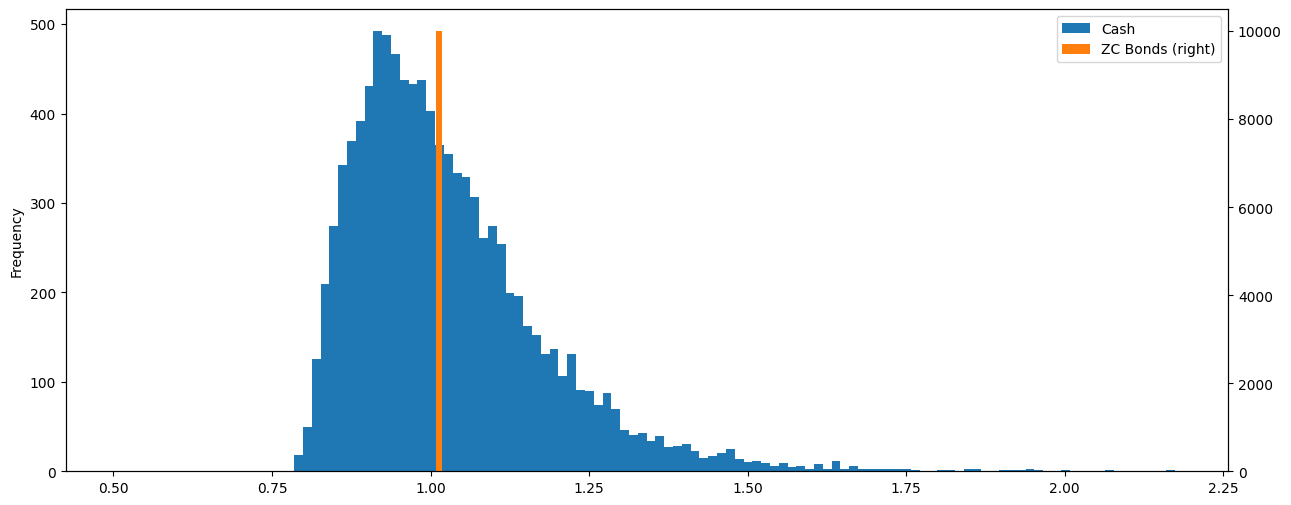

In [57]:
#at the last point in time
tfr_cash=av_cash.iloc[-1]/liabilities.iloc[-1]
tfr_zc_bonds=av_zc_bonds.iloc[-1]/liabilities.iloc[-1]
ax=tfr_cash.plot.hist(label="Cash", figsize=(15,6), bins=100, legend=True)
tfr_zc_bonds.plot.hist(ax=ax,label="ZC Bonds", bins=100, legend=True, secondary_y=True)

The unique "convinent" assumption is that we have 0.75 million and 10 years to get the million. Repeat this time stating with 0.5

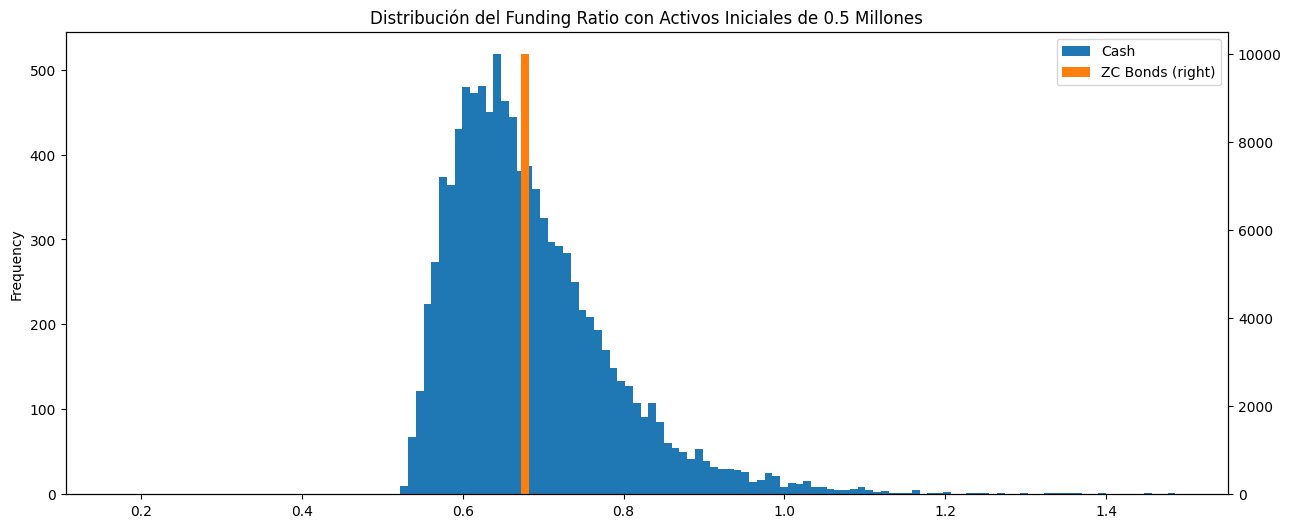

In [58]:
# Monto inicial ajustado a 0.5 millones
a_0 = 0.5

# Simulación de tasas de interés y precios de bonos usando el modelo CIR
rates, bond_prices = cir(r_0=0.03, b=0.03, sigma=0.05, n_years=10, n_scenarios=10000)

# Liabilities modeladas como precios de los bonos
liabilities = bond_prices

# Definir un bono cero cupón que madura en 10 años
zcbond_10 = pd.Series(data=[1], index=[10])  # $1 que madura en 10 años

# Valor presente del bono cero cupón con tasa de 0.03
zc_0 = pv(zcbond_10, 0.03)  # Calcula el PV del bono

# Número de bonos que podemos comprar con los activos iniciales
n_bonds = a_0 / zc_0

# Valor de los activos suponiendo que compramos bonos cero cupón
av_zc_bonds = n_bonds * bond_prices

# Valor de los activos si se invierte en efectivo
av_cash = a_0 * (rates / 12 + 1).cumprod()

# Calcular los ratios de financiamiento al final del periodo
tfr_cash = av_cash.iloc[-1] / liabilities.iloc[-1]  # Funding ratio con efectivo
tfr_zc_bonds = av_zc_bonds.iloc[-1] / liabilities.iloc[-1]  # Funding ratio con bonos

# Graficar las distribuciones del funding ratio
ax = tfr_cash.plot.hist(label="Cash", figsize=(15, 6), bins=100, legend=True)
tfr_zc_bonds.plot.hist(ax=ax, label="ZC Bonds", bins=100, legend=True, secondary_y=True)
plt.title("Distribución del Funding Ratio con Activos Iniciales de 0.5 Millones")
plt.show()


##### **R4. Assume that your liability is in Cash. Use the previous 5 scenarios you defined in R3 for the CIR modelling, and compute the funding ratio. Provide an analysis on how to use CIR to model liabilities and the funding ratio.**

## 5 GHP and Duration Matching

If we can find bonds that match our liabilities, then that's a good choice to immunize our libilities. If we don't find
 zero cuopon bonds, then we could use coupon bonds making a duration matching.


 The GHP (Goal-based Hedging Portfolio) and Duration Matching sections are often part of Liability-Driven Investment (LDI) strategies and are used to manage interest rate risk and ensure that investment portfolios can meet future obligations.

 The Goal-based Hedging Portfolio (GHP) is a strategy designed to reduce the risk of failing to meet specific investment goals, typically related to future liabilities. It focuses on constructing a portfolio that aligns closely with the cash flow needs or specific financial goals of the investor or institution. By aligning investments with specific goals, the GHP lowers the risk of being unable to meet obligations. GHP helps maintain a stable funding ratio by reducing exposure to market volatility, especially when cash flow needs are predictable and significant.

 On the other hand, duration Matching is a risk management technique used to align the interest rate sensitivity of assets and liabilities in a portfolio. The goal is to ensure that changes in interest rates have a similar effect on both assets and liabilities, minimizing interest rate risk.

 Both GHP and Duration Matching are focused on managing the risk associated with meeting future liabilities. While GHP focuses on creating a portfolio to achieve specific financial goals (like liability payments), Duration Matching ensures that the portfolio remains stable in the face of interest rate changes. Together, they provide a robust framework for institutions needing to manage assets in alignment with liabilities, reducing the risk of funding shortfalls and protecting the institution's financial stability.

Thus, for implementing GHP and duration matching first we'll use regular
 coupon payment to replace the leak of zero coupon bonds.

 ##### **E16. Implement a function to compute the returns of a bond. Then implement a fucntion to use these cashflows to compute the price of the bond.**

In [59]:
def bond_cash_flows(maturity, principal=100, coupon_rate=0.03, coupons_per_year=12):
    """
    Returns a series of cash flows generated by a bond, indexed by coupon number.

    Parameters:
    - maturity: Time to maturity in years.
    - principal: Face value of the bond (default is 100).
    - coupon_rate: Annual coupon rate (default is 0.03 or 3%).
    - coupons_per_year: Number of coupons per year (default is 12, for monthly).

    Returns:
    - A pandas Series of cash flows indexed by coupon number.
    """
    n_coupons = round(maturity * coupons_per_year)  # Total number of coupons
    coupon_amt = (coupon_rate / coupons_per_year) * principal  # Amount of each coupon payment
    coupon_times = np.arange(1, n_coupons + 1)  # Coupon indices (1 to n_coupons)
    cash_flows = pd.Series(data=coupon_amt, index=coupon_times)  # Regular coupon payments
    cash_flows.iloc[-1] += principal  # Add principal repayment to the final payment
    return cash_flows


To get cash flows for a 3-year bond with a 3% coupon rate paid semiannually

In [60]:
bond_cash_flows(3, 100, 0.03, 2)

1      1.5
2      1.5
3      1.5
4      1.5
5      1.5
6    101.5
dtype: float64

The bond_price function calculates the bond's price based on its cash flows and the discount rate. The price is the present value of the cash flows.

In [61]:
def bond_price(maturity, principal=100, coupon_rate=0.03, coupons_per_year=12, discount_rate=0.03):
    """
    Price a bond based on bond parameters and discount rate.

    Parameters:
    - maturity: Time to maturity in years.
    - principal: Face value of the bond (default is 100).
    - coupon_rate: Annual coupon rate (default is 0.03 or 3%).
    - coupons_per_year: Number of coupons per year (default is 12, for monthly payments).
    - discount_rate: Annual discount rate (default is 0.03 or 3%).

    Returns:
    - The present value (price) of the bond.
    """
    # Obtener los flujos de caja del bono
    cash_flows = bond_cash_flows(maturity, principal, coupon_rate, coupons_per_year)

    # Tasa de descuento mensual (dividir tasa anual entre el número de pagos por año)
    monthly_discount_rate = discount_rate / coupons_per_year

    # Calcular el valor presente de los flujos de caja
    bond_price = pv(cash_flows, monthly_discount_rate)

    return bond_price


Calculate the price of a 20-year bond with a 5% coupon rate and a 4% discount rate

In [62]:
bond_price(20, 1000, 0.05, 2, 0.04)


1136.7773962036904

Now, assume we have the following rates and compute the bonds with these rates. How can you interpret the resulting plot?

In [63]:
rates=np.linspace(0.01,.1,num=20)
rates

array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ])

<Axes: title={'center': 'Prices 10y Bond with different Interest Rate'}>

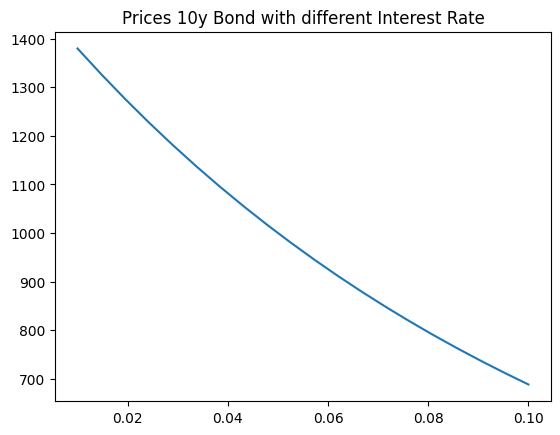

In [64]:
prices= [bond_price(10,1000,0.05,2,rate) for rate in rates]
pd.DataFrame(data=prices,index=rates).plot(title="Prices 10y Bond with different Interest Rate", legend=False)

The problem with these bonds is the intermediate cash flows. Remember that a bond with coupons are multiple
 zero coupon bonds together, and the problem is that some of those have a short time term.

In [65]:
cf=bond_cash_flows(3,1000,.06,2)
cf

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
6    1030.0
dtype: float64

 We have cashflows, but it's better to get 30 today than 3 years in the future, right? Thus, how long are we waiting until we get the cashflows? We could compute the weighted average time.

In [66]:
discounts=discount(cf.index,0.06/2)
discounts

Index([ 0.970873786407767, 0.9425959091337544, 0.9151416593531596,
       0.8884870479156888, 0.8626087843841639, 0.8374842566836542],
      dtype='float64')

 These are the discount factors. Now, we discounted values:

In [67]:
dcf = cf * discounts
dcf

1     29.126214
2     28.277877
3     27.454250
4     26.654611
5     25.878264
6    862.608784
dtype: float64

 This is the discounted values of the present values for the cashflows. Now, we can get the weights.

In [68]:
weights = dcf / dcf.sum()
weights_series = weights.reset_index(drop=True)
print(weights_series)


0    0.029126
1    0.028278
2    0.027454
3    0.026655
4    0.025878
5    0.862609
dtype: float64


 Finally, we make a weighted average.

In [69]:
# Suponiendo que los pesos corresponden a una serie de valores, como por ejemplo las asignaciones a activos riesgosos (por ejemplo, risky_w)

# Pesos para el cálculo del promedio ponderado (por ejemplo, usando las asignaciones de activos riesgosos)
weights = risky_w_history.iloc[:, 0]  # Usamos la primera columna para los pesos (esto puede variar según tu estructura)

# Valores a ponderar (por ejemplo, el valor de la cuenta)
values = account_history.iloc[:, 0]  # Usamos la primera columna para los valores (esto puede variar según tu estructura)

# Calcular el promedio ponderado
weighted_average = (values * weights).sum() / weights.sum()  # Promedio ponderado (valores * pesos) / suma de pesos

# Mostrar el resultado
print("Promedio ponderado:", weighted_average)


Promedio ponderado: 1389.7194916018204


 Notice that this is something we know, called The Macaulay Duration. The Macaulay Duration of a bond is the weighted average time until cash flows are received. This measure helps to determine the sensitivity of bond prices to interest rate changes.The weighted average time we have to
 wait is 5.58 event though the maturity is 6. And as you know Macaculay Duration is related to the fisrt derivative of the price
 respect to the price, if it is greater, so is the change in the price with movements in the interest rates.
 And the Macaulay Duration of a zero coupon bond is the maturity, as we know.

 ##### **E17. Implement a function that computes the Macaulay Duration**

In [70]:
def macaulay_duration(flows, discount_rate):
    discounted_flows = flows * discount(flows.index, discount_rate)
    weights = discounted_flows / discounted_flows.sum()
    return np.average(flows.index, weights=weights)

macaulay_duration(flows=cf, discount_rate=0.06 / 2)


5.579707187194534

In [71]:
macaulay_duration(bond_cash_flows(3,1000,0.06,2), 0.06/2)

5.579707187194534

Now, as we know one technique of immunization is to match the duration. Doing this, we could have the same
 sensitive to changes on interest rate for the liabilities and assets. Constructing a portfolio with this can give us
 protection, but just for parallel changes on interest rates. But the yield curve is more complex. By the time being,
 let's make duration matching.

If a zero-coupon bond does not match the maturity of our liabilities, we can use two bonds with different maturities to achieve the desired duration through weighted allocation.

In [72]:
#define liabilities
liabilities = pd.Series(data=[100000, 100000], index=[10, 12])

Now, we define bonds with different maturities and calculate their Macaulay durations.

In [73]:
md_10 = macaulay_duration(bond_cash_flows(10, 1000, 0.05, 1), 0.04)
md_20 = macaulay_duration(bond_cash_flows(20, 1000, 0.05, 1), 0.04)
md_10, md_20

(8.190898824083233, 13.544718122145921)

 We know the durations of each bond, thus, to immunize this by matching durations we must
 compute the weights to buy for each bond so that the resulted duration is the one we need to match.

 Your task is to calculate the weight
$W$ of a short-duration asset (or bond) in a portfolio that also includes a long-duration asset. By correctly applying this weight, you'll create a duration-matched portfolio aligned with the target cash flows (e.g., future liabilities).

The first step is to calculate the Macaulay duration of the target cash flows $d_t$, which represent the liabilities or future cash obligations. Next, calculate the Macaulay durations of the short-duration asset $d_s$ and the long-duration asset $d_l$. Then,

$$W=\frac{d_l-d_t}{d_l-d_s}$$


By computing the appropriate weights, you’ll create a portfolio that mirrors the duration of your liabilities, effectively hedging against interest rate changes. This process stabilizes the funding ratio and ensures that fluctuations in interest rates won’t cause large mismatches in the value of your assets and liabilities.




##### **E18.Implement the match duration function to determine the weights of each bond required to match the liability duration**



In [74]:
def match_duration(cf_t, cf_s, cf_l, discount_rate):
    d_t = macaulay_duration(cf_t, discount_rate)  # Duración objetivo
    d_s = macaulay_duration(cf_s, discount_rate)  # Bono corto
    d_l = macaulay_duration(cf_l, discount_rate)  # Bono largo
    w_s = (d_l - d_t) / (d_l - d_s)  # Peso necesario
    return w_s


In [75]:
# Definir los flujos de caja objetivo (liabilities) para obtener el resultado esperado
cf_target = bond_cash_flows(maturity=15, principal=1000, coupon_rate=0.05, coupons_per_year=1)

# Supongamos que el bono de corta duración es de 10 años y el de larga duración es de 20 años
short_bond = bond_cash_flows(maturity=10, principal=1000, coupon_rate=0.05, coupons_per_year=1)
long_bond = bond_cash_flows(maturity=20, principal=1000, coupon_rate=0.05, coupons_per_year=1)

# Calcular los pesos para igualar las duraciones
w_s = match_duration(cf_target, short_bond, long_bond, discount_rate=0.03)  # Peso para el bono corto
w_l = 1 - w_s  # Peso para el bono largo

# Imprimir los resultados
print("Peso para el bono corto:", w_s)
print("Peso para el bono largo:", w_l)


Peso para el bono corto: 0.45990413744885383
Peso para el bono largo: 0.5400958625511462


Given the calculated weights, construct the portfolio by allocating funds proportionally to each bond.

In [76]:
# Calcular el precio de los bonos corto y largo
price_short = bond_price(10, 1000, 0.05, 1, 0.04)  # Precio del bono de 10 años
price_long = bond_price(20, 1000, 0.05, 1, 0.04)  # Precio del bono de 20 años

# Valor inicial de los activos, asumimos 130,000
a_0 = 130000

# Calcular los flujos de efectivo del portafolio basados en los pesos y precios
portfolio_flows = pd.concat([
    a_0 * w_s * short_bond / price_short,  # Asignación proporcional al bono corto
    a_0 * w_l * long_bond / price_long    # Asignación proporcional al bono largo
])

# Mostrar los flujos de efectivo del portafolio
print(portfolio_flows)


1      2765.102326
2      2765.102326
3      2765.102326
4      2765.102326
5      2765.102326
6      2765.102326
7      2765.102326
8      2765.102326
9      2765.102326
10    58067.148838
1      3090.600423
2      3090.600423
3      3090.600423
4      3090.600423
5      3090.600423
6      3090.600423
7      3090.600423
8      3090.600423
9      3090.600423
10     3090.600423
11     3090.600423
12     3090.600423
13     3090.600423
14     3090.600423
15     3090.600423
16     3090.600423
17     3090.600423
18     3090.600423
19     3090.600423
20    64902.608884
dtype: float64


In [77]:
macaulay_duration(portfolio_flows,0.04)

11.082474475813374

 Now, let's compute the funding ratio

In [78]:
def funding_ratio(assets, liabilities, r_a, r_l):
    """
    Computes the funding ratio of given assets and liabilities with respective discount rates.
    """
    # Alinear índices de activos y obligaciones
    aligned_assets = assets.reindex(liabilities.index, fill_value=0)

    # Calcular los valores presentes
    pv_assets = pv(aligned_assets, r_a)  # Valor presente de los activos
    pv_liabilities = pv(liabilities, r_l)  # Valor presente de las obligaciones

    # Evitar divisiones por cero
    if pv_liabilities == 0:
        return float('inf')

    # Retornar el Funding Ratio
    return pv_assets / pv_liabilities


In [79]:
# Combinar flujos con índices duplicados sumando los valores
portfolio_flows = portfolio_flows.groupby(portfolio_flows.index).sum()

# Alinear índices de los flujos del portafolio con los de las obligaciones
portfolio_flows_aligned = portfolio_flows.reindex(liabilities.index, fill_value=0)

# Calcular el Funding Ratio
fr = funding_ratio(portfolio_flows_aligned, liabilities, 0.04, 0.04)
print(f"Funding Ratio: {fr}")


Funding Ratio: 0.3326230881212306


 So, we're pretty funded. The question now is what happens to the funding ratio when there are changes on interest rates and a bunch of cashflows.

 ##### **R5. Explain GHP and duration matching in liability driven investing. To assess the sensitivity of the funding ratio to changes in interest rates, calculate the funding ratios for a range of rates. Consider 20 rates between 0 and 0.1 using linspace(), consider your previous long and short bonds and prices. Then, compute the funding ratio for the long bond using the 20 rates. Compute the funding ratio for the short bond with the rates. Finally, use the previous portfolio_flows and liabilities to compute the funding ratio with the rates. Plot these 3 series and explain what you see. Assess the sensitivity of the funding ratio to changes in interest rates.**

## 6 Simulation of Prices of Coupon Bonds using CIR

We have seen how to work with bonds, and again, bonds depend on the interest rate. Therefore, we can again use CIR to model bond prices!

First, let's improve our discount and pv function by doing vectorization.

In [80]:
def discount(t, r):
    """
    Compute the price of a pure discount bond that pays $1 at time t,
    given an interest rate r.
    Returns a DataFrame with discount factors for each time and rate.

    Parameters:
    - t: List or Series of times (in years).
    - r: Float, Series, or DataFrame of rates.

    Returns:
    - A DataFrame indexed by time, where each column corresponds to a rate.
    """
    if np.isscalar(r):
        r = pd.Series([r], name="Rate")
    discounts = pd.DataFrame([(1 + r) ** -i for i in t])
    discounts.index = t
    return discounts

def pv(flows, r):
    """
    Computes the Present Value (PV) of a set of cashflows.

    Parameters:
    - flows: A Series indexed by time, with cashflows as values.
    - r: Float, Series, or DataFrame of rates.

    Returns:
    - A scalar, Series, or DataFrame of PVs depending on the input rate.
    """
    dates = flows.index
    discounts = discount(dates, r)
    return discounts.multiply(flows, axis="rows").sum()


In [81]:
bond_price(5,100,0.05,12,0.03)

0    109.275393
dtype: float64

In [82]:
# Simular tasas de interés y precios de bonos ZC utilizando el modelo CIR
rates, zc_prices = cir(10, 500, b=0.03, r_0=0.03)

# Mostrar las primeras filas de las simulaciones
print("Simulaciones de tasas de interés:")
print(rates.head())

print("\nSimulaciones de precios de bonos ZC:")
print(zc_prices.head())


Simulaciones de tasas de interés:
        0         1         2         3         4         5         6    \
0  0.030000  0.030000  0.030000  0.030000  0.030000  0.030000  0.030000   
1  0.031279  0.026643  0.032404  0.032559  0.027284  0.029841  0.033013   
2  0.030701  0.027568  0.032518  0.031825  0.028248  0.033608  0.035575   
3  0.034647  0.028259  0.026112  0.026196  0.027491  0.036573  0.037052   
4  0.026898  0.029349  0.030013  0.029343  0.028561  0.038701  0.032665   

        7         8         9    ...       490       491       492       493  \
0  0.030000  0.030000  0.030000  ...  0.030000  0.030000  0.030000  0.030000   
1  0.033329  0.031976  0.030080  ...  0.031758  0.030191  0.027943  0.029906   
2  0.028554  0.032387  0.030625  ...  0.030090  0.028279  0.029219  0.027723   
3  0.024743  0.034083  0.030858  ...  0.033488  0.029115  0.027914  0.027932   
4  0.024563  0.036758  0.026736  ...  0.032502  0.028167  0.026747  0.027586   

        494       495       496   

In [83]:
#bond prices
bond_price(5,100,0.05,12,rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [84]:
bond_price(5,100,0.05,12,rates.iloc[1][[1,2,3]]) #time 1

1    110.922865
2    108.112250
3    108.037532
dtype: float64

In [85]:
rates[[1,2,3]].head()

1         2         3
0  0.030000  0.030000  0.030000
1  0.026643  0.032404  0.032559
2  0.027568  0.032518  0.031825
3  0.028259  0.026112  0.026196
4  0.029349  0.030013  0.029343

 And let's improve the bond_price function

The bond_price function calculates the price of a bond that pays coupons until maturity, with the principal returned at maturity. The function can handle a discount_rate input as a DataFrame to simulate varying rates over time

In [86]:
def bond_price(maturity, principal=100, coupon_rate=0.03, coupons_per_year=12, discount_rate=0.03):
    """
    Computes the price of a bond that pays coupons until maturity.
    """
    if isinstance(discount_rate, pd.DataFrame):
        pricing_dates = discount_rate.index
        prices = pd.DataFrame(index=pricing_dates, columns=discount_rate.columns)
        for t in pricing_dates:
            prices.loc[t] = bond_price(maturity - t / coupons_per_year, principal, coupon_rate, coupons_per_year, discount_rate.loc[t])
        return prices
    else:
        if maturity <= 0:
            return principal + principal * coupon_rate / coupons_per_year
        cash_flows = bond_cash_flows(maturity, principal, coupon_rate, coupons_per_year)
        return pv(cash_flows, discount_rate / coupons_per_year)


Using the simulated interest rates, we calculate bond prices over time with the bond_price function. The price evolution shows how interest rate fluctuations affect bond prices.

<Axes: >

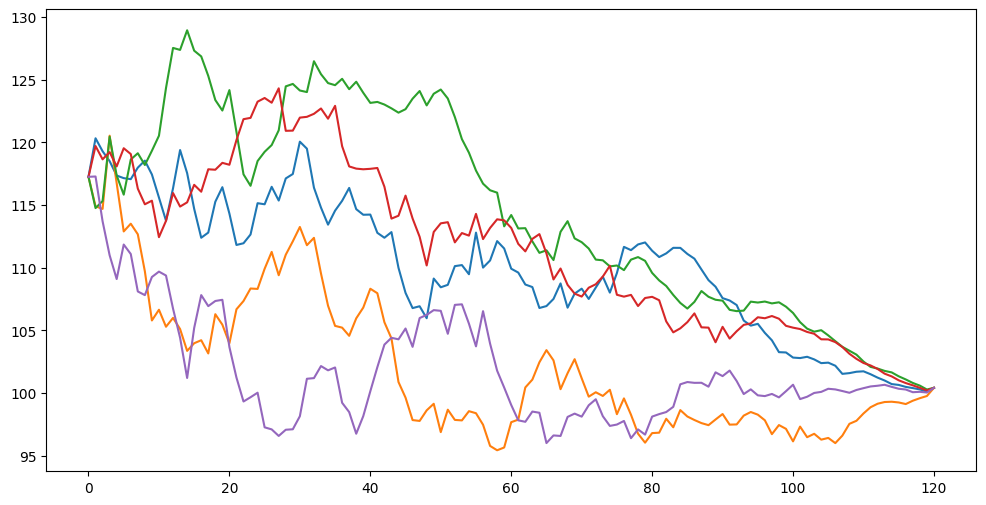

In [87]:
bond_price(10,100,0.05,12,rates[[1,2,3,4,5]]).plot(legend=False, figsize=(12,6))

To evaluate bond performance, we calculate the annualized bond returns based on percentage changes in bond prices. This reveals how bond returns respond to interest rate changes

In [88]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of periodic returns.

    Parameters:
    - r: pd.Series or pd.DataFrame of returns
    - periods_per_year: Number of compounding periods per year (e.g., 12 for monthly, 252 for daily)

    Returns:
    - Annualized return
    """
    # Calcular el crecimiento compuesto total (1 + r acumulado)
    compounded_growth = (1 + r).prod()

    # Número de periodos (longitud de la serie de retornos)
    n_periods = r.shape[0]

    # Calcular el retorno anualizado
    return compounded_growth ** (periods_per_year / n_periods) - 1


In [89]:
prices=bond_price(10,100,0.05,12,rates[[1,2,3,4,5]])
br = prices.pct_change().dropna()
annualize_rets(br, 12)

<ipython-input-89-4363e2223847>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  br = prices.pct_change().dropna()


1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

 why are they negative? The reason is that we are looked at the price return, but we're interested in the total
 return, which is the value considering the coupons (dividends/payments).

 ##### **E19. Compute the bond total returns**

In [90]:
def bond_total_return(monthly_prices, principal, coupon_rate, coupons_per_year):
    """
    Computes the total return of a bond, including coupon payments.

    Parameters:
    - monthly_prices: DataFrame of monthly bond prices (each column is a different scenario)
    - principal: Bond principal (face value)
    - coupon_rate: Annual coupon rate of the bond
    - coupons_per_year: Number of coupon payments per year

    Returns:
    - DataFrame of total returns, accounting for both price changes and coupon payments.
    """
    # Initialize DataFrame for coupons, matching the structure of monthly_prices
    coupons = pd.DataFrame(0, index=monthly_prices.index, columns=monthly_prices.columns)
    t_max = monthly_prices.index.max()

    # Define payment dates (in terms of months) for the coupons
    pay_dates = np.linspace(12 / coupons_per_year, t_max, int(coupons_per_year * t_max / 12), dtype=int)

    # Populate coupon payments at the defined payment dates
    coupons.iloc[pay_dates] = principal * coupon_rate / coupons_per_year

    # Calculate total returns by adding the coupon payments to the bond price (monthly)
    total_returns = (monthly_prices + coupons) / monthly_prices.shift() - 1

    # Drop the initial row since it has no previous price for return calculation
    return total_returns.dropna()


In [91]:
p=bond_price(10,100,0.05,12,rates[[1,2,3,4,]])
btr=bond_total_return(p,100,0.05,12)
annualize_rets(btr,12)

<ipython-input-90-d8ee409278a6>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coupons.iloc[pay_dates] = principal * coupon_rate / coupons_per_year
<ipython-input-90-d8ee409278a6>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coupons.iloc[pay_dates] = principal * coupon_rate / coupons_per_year
<ipython-input-90-d8ee409278a6>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coupons.iloc[pay_dates] = principal * co

1    0.030432
2    0.034088
3    0.028743
4    0.029846
dtype: object

 As we can see, bond prices change over time. The dynamics of interest rates is affecting us

In [92]:
price_10=bond_price(10,100,0.05,12,rates)
price_10[[1,2,3]].tail()

1           2           3
116  100.491454    99.12248  101.086317
117  100.396396   99.389044  100.806869
118  100.291164   99.590612   100.59286
119  100.118285   99.764494  100.281818
120  100.416667  100.416667  100.416667

 As you can see the bonds have converged to their final payment. Now, let's do the same but for 30y as you
 remember we have generated rates for 10y, so the prices are not going to converge as we still have 20 years of
 variation.

In [93]:
# Calcular precios del bono a 30 años utilizando las tasas generadas previamente
price_30 = bond_price(30, 1000, 0.05, 12, rates)

# Mostrar las últimas filas de los precios para las columnas [1, 2, 3]
price_30[[1, 2, 3]].tail()


1           2            3
116  1215.557494  725.044763  1560.362741
117  1233.063503  742.170841  1550.905404
118    1259.3282  742.206544  1623.600471
119  1203.763892  712.801628  1580.564153
120  1197.223733  682.781099  1598.348411

So, bonds tend to be tought as safe,but they are not, this is clear when the maturity is long.
 Let's make a portfolio with the two bonds. Use a 60/40 combination using the 10 and 30 year bonds

In [94]:
# Calcular los retornos totales de los bonos a 30 años y 10 años
rets_30 = bond_total_return(price_30, 1000, 0.05, 12)
rets_10 = bond_total_return(price_10, 1000, 0.05, 12)

# Inicializar los retornos del portafolio
weights = [0.6, 0.4]  # 60% en el bono a 30 años, 40% en el bono a 10 años
rets_bonds = pd.DataFrame(index=rets_30.index, columns=rets_30.columns)

# Rebalanceo mensual para mantener la proporción inicial
for t in range(len(rets_30)):
    if t == 0:
        # Primer mes, aplicar pesos iniciales
        rets_bonds.iloc[t] = weights[0] * rets_30.iloc[t] + weights[1] * rets_10.iloc[t]
    else:
        # Rebalancear al final de cada mes
        portfolio_value_30 = (rets_bonds.iloc[:t, 0] + 1).prod() * weights[0]
        portfolio_value_10 = (rets_bonds.iloc[:t, 1] + 1).prod() * weights[1]
        total_value = portfolio_value_30 + portfolio_value_10
        weights_rebalanced = [portfolio_value_30 / total_value, portfolio_value_10 / total_value]

        # Calcular retornos ponderados
        rets_bonds.iloc[t] = (
            weights_rebalanced[0] * rets_30.iloc[t]
            + weights_rebalanced[1] * rets_10.iloc[t]
        )

# Mostrar resultados iniciales
print(rets_bonds.head())


<ipython-input-90-d8ee409278a6>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coupons.iloc[pay_dates] = principal * coupon_rate / coupons_per_year
<ipython-input-90-d8ee409278a6>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coupons.iloc[pay_dates] = principal * coupon_rate / coupons_per_year
<ipython-input-90-d8ee409278a6>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coupons.iloc[pay_dates] = principal * coupo

        0         1         2         3         4         5         6    \
1 -0.002195  0.063452 -0.017193 -0.019238  0.053996  0.017496  -0.02517   
2  0.023941  0.002441  0.014717  0.026259  0.002058 -0.033806 -0.017216   
3 -0.035878  0.005691  0.108504  0.096812  0.025844 -0.022303 -0.002637   
4  0.127744  0.000944 -0.036446  -0.02675  0.001016 -0.010001  0.077186   
5 -0.001757  0.013782   -0.0401 -0.006043  0.038957  0.061642  0.060186   

        7         8         9    ...       490       491       492       493  \
1  -0.02928 -0.011524   0.01418  ... -0.008628  0.012646  0.044394    0.0166   
2  0.083801  0.010635  0.008417  ...  0.039112  0.042455 -0.001961  0.046292   
3  0.069963 -0.006417  0.012602  ... -0.029192  0.003899  0.033646  0.012339   
4  0.017511 -0.017745  0.074075  ...  0.029887  0.028821  0.031735  0.020342   
5 -0.017898  -0.01261 -0.038154  ... -0.003296  0.034332  0.024462  0.017305   

        494       495       496       497       498       499  
1  0

In [95]:
mean_rets_bonds=rets_bonds.mean(axis='columns') #series for each column
summary_stats(pd.DataFrame(mean_rets_bonds))

Annualized Return Annualized Vol  Skewness  Kurtosis Cornish-Fisher VaR(5%)  \
0         60.304901       0.022587  0.011797 -0.039877               0.014127   

  Historic VaR(5%) CVar(5%) Sharpe Ratio Max Drawdown  
0        -0.014416      NaN   2669.91407          0.0

Obviously, it has no drawdowns as it is composed.

Awesome, so you have used CIR to model bonds, rets_bonds. But apart from bonds, portfolios are often constructed using equities. Now, you know that you can use GBM to model equities. Therefore, we can now combine CIR for bonds with GBM for equities to simulate a portfolio that combines both!

##### **R6. Explain how CIR is used for modelling coupon bonds, and give empirical evidence that bonds are not safe at all using a 60/40 composition of bonds (you can use your previous results). Then, use GBM to simulate equities for 10 years, in 500 scenarios with a mean of 0.07 and std of 0.15. Once you have the simulation of equities, convert them to returns, i.e. percentual changes (if you use pct_change() remember to use dropna() to delete the first na element). Once you have the returns of the equities combine them with the previous returns of bonds, rets_bonds, in a portfolio that has a 0.7/0.3 split (equities/bonds). Compute the mean of the 70/30 portfolio returns. Compute the risk-return statistics and analyze the results. Compare them with the bonds returns alone.**

 With this, you have combined a portfolio of stocks and bonds in a 70/30 mix. The question now is: How do we properly choose these weights? The goal now
 is that we have assets, liabilities, and we have to find out the weights to mix them properly, this is again what we've seen as the
 allocation problem. What is the correct combination of stocks and bonds?


## 7 Naive Risk Budgeting Strategies between the PSP and GHP

The next step is to find out how to combine portfolios that seek for performance (take risk) with portfolios that protect goals (liabilities).

As always with these mixing problems, let's begin by testing different mixings of the portfolios and see what would have happened. Thus, let's code back testor to test the proficiency of different mixes of two portfolio.

The following function bactest a mix of sets of returns.

In [96]:
#allocator is a free function to allocate that the user gives. **kwargs allows us to take the function and whichever variable within.
def bt_mix(r1,r2, allocator, **kwargs):
    """
    Runs a back test (simulation) of allocating between a two sets of returns
    r1 and r2 are TxN DataFrames or returns where T is the time step and N is the number of scenarios.
    allocator is a function that takes two set of returns and allocator specific parameters, and produces
    an allocation tot the first portfolio (the rest of the money is invested in the GHP) as a T x 1 DataFrame
    Returns a TxN DataFrame of the resulting N portfolio scenarios.
    """
    if not r1.shape== r2.shape:
        raise ValueError("r1 and r2 need to have the same shape")
    weights=allocator(r1,r2, **kwargs) #The allocator takes r1, r2 and a bunch of other variables
    if not weights.shape==r1.shape:
        raise ValueError("Allocator results not matching r1 shape")
    r_mix=weights*r1+(1-weights)*r2
    return r_mix

The following function produces a time series over T steps of allocation between the PSP and the GHP across N scenarios.

In [97]:
def fixedmix_allocator(r1,r2, w1, **kwargs):
    """
    Produces a time series over T steps of allocation between the PSP
    and the GHP across N scenarios.
    PSP and GHP are TxN DataFrames that represent the returns of the PSP and GHP such that:
    each column is a scenario
    each row is the price for a timestep
    returns an TxN DataFrame of PSP Weights
    """
    return pd.DataFrame(data=w1, index=r1.index, columns=r1.columns)

The following function is the same as before to compute the total bond return.

In [103]:
def bond_total_return(monthly_prices, principal, coupon_rate, coupons_per_year):
    """
    Computes the total return of a bond on monthly bond prices and coupon payments.

    Assumes:
    - Dividends (coupons) are paid out at the end of the period (e.g., end of 3 months for quarterly payments).
    - Dividends are reinvested in the bond.

    Parameters:
    - monthly_prices: DataFrame of monthly bond prices (TxN, where T is time steps and N is scenarios).
    - principal: The face value of the bond.
    - coupon_rate: Annual coupon rate of the bond.
    - coupons_per_year: Number of coupon payments per year.

    Returns:
    - DataFrame of total returns for the bond, accounting for both price changes and coupon payments.
    """
    # Initialize a DataFrame for coupon payments
    coupons = pd.DataFrame(data=0, index=monthly_prices.index, columns=monthly_prices.columns)
    t_max = monthly_prices.index.max()  # Maximum time step (end of the bond's life)

    # Calculate the payment dates in terms of months
    pay_dates = np.linspace(12 / coupons_per_year, t_max, int(coupons_per_year * t_max / 12), dtype=int)

    # Assign coupon payments at the defined pay dates
    for pay_date in pay_dates:
        if pay_date in coupons.index:  # Ensure payment date is within the index
            coupons.loc[pay_date] = principal * coupon_rate / coupons_per_year

    # Calculate the total returns: (Price + Coupon) / Previous Price - 1
    total_returns = (monthly_prices + coupons) / monthly_prices.shift() - 1

    # Drop the first row as it contains NaN due to the shift operation
    return total_returns.dropna()


Now, we obtain the returns of bonds.

In [104]:
# Use the appropriate functions to simulate the expected results
# Simulación de tasas e índices de precios para bonos
rates, zc_prices = cir(10, 500, b=0.03, r_0=0.03)  # Simula tasas usando el modelo CIR
price_10 = bond_price(10, 100, 0.05, 12, rates)  # Precios de bonos a 10 años
price_30 = bond_price(30, 100, 0.05, 12, rates)  # Precios de bonos a 30 años

# Cálculo de retornos totales de los bonos
rets_10 = bond_total_return(price_10, 100, 0.05, 12)  # Retornos para bonos a 10 años
rets_30 = bond_total_return(price_30, 100, 0.05, 12)  # Retornos para bonos a 30 años

# Uso del asignador de backtesting con una asignación fija del 60% al bono de 10 años
rets_bonds = bt_mix(
    r1=rets_10,
    r2=rets_30,
    allocator=fixedmix_allocator,
    w1=0.6  # Asignación del 60% al bono de 10 años
)

# Salida opcional para verificar resultados
print("Tasas simuladas (ejemplo):")
print(rates[[1, 2, 3]].head())

print("\nPrecios de bonos a 10 años (ejemplo):")
print(price_10[[1, 2, 3]].head())

print("\nPrecios de bonos a 30 años (ejemplo):")
print(price_30[[1, 2, 3]].head())

print("\nRetornos de bonos combinados (ejemplo):")
print(rets_bonds[[1, 2, 3]].head())


<ipython-input-103-6d0cfe7534bf>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coupons.loc[pay_date] = principal * coupon_rate / coupons_per_year
<ipython-input-103-6d0cfe7534bf>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coupons.loc[pay_date] = principal * coupon_rate / coupons_per_year
<ipython-input-103-6d0cfe7534bf>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coupons.loc[pay_date] = principal * coupo

Tasas simuladas (ejemplo):
          1         2         3
0  0.030000  0.030000  0.030000
1  0.028815  0.030531  0.026999
2  0.029426  0.030199  0.028775
3  0.034219  0.034011  0.032404
4  0.036230  0.039522  0.030386

Precios de bonos a 10 años (ejemplo):
            1           2           3
0  117.260292  117.260292  117.260292
1  118.254591  116.640106  119.991856
2   117.54881   116.82807  118.159806
3  113.067582  113.251914   114.69333
4  111.215569   108.40699   116.41145

Precios de bonos a 30 años (ejemplo):
            1           2           3
0  139.531564  139.531564  139.531564
1  142.441235  138.157548  147.173839
2   140.82476  138.905502  142.469134
3  129.431628  129.894938  133.566611
4  125.011477  118.287763  138.313739

Retornos de bonos combinados (ejemplo):
          1         2         3
1  0.016755 -0.003786  0.039212
2 -0.004836  0.006482 -0.018732
3 -0.051924 -0.040974 -0.039312
4 -0.019989 -0.057921  0.026632
5  0.023434  0.001036 -0.055486


In [105]:
mean_rets_bonds=rets_bonds.mean(axis="columns")
summary_stats(pd.DataFrame(mean_rets_bonds))

Annualized Return Annualized Vol  Skewness  Kurtosis Cornish-Fisher VaR(5%)  \
0           1.11079       0.014687  0.261122  0.556918               0.001447   

  Historic VaR(5%) CVar(5%) Sharpe Ratio Max Drawdown  
0        -0.001551      NaN    75.632683          0.0

Again, we are going to generate equity returns and bond returns and mix them. Same as before.

In [106]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07,sigma=0.15,steps_per_year=12, s_0=100.0,prices=True):
    """
    Evolution of a Stock Price using GBM
    """
    dt=1/steps_per_year
    n_steps=int(n_years*steps_per_year)

    if prices:
        rets_plus_1=np.random.normal(loc=1+mu*dt,scale=sigma*np.sqrt(dt),size=(n_steps+1,n_scenarios)) #loc is the mean, and scale the std
        rets_plus_1[0]=1
        prices=s_0*pd.DataFrame(rets_plus_1).cumprod()
        return prices
    else:
        rets=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt),size=(n_steps+1,n_scenarios))
        return rets

In [107]:
price_eq=gbm(n_years=10,n_scenarios=500,mu=0.07,sigma=0.15)
rets_eq=price_eq.pct_change().dropna()
rets_zc=zc_prices.pct_change().dropna()

##### **E21. Use the backtester mixer to mix the returns of the equities and bonds using the fixedmixallocator with a weight w1 of 0.7. This returns a 70/30 portfolio. Then compute the mean of these returns using mean(axis=1). Apply the summary statistics. Notice that this first approach generates a time series of the average results and then computes the statistics. Now, take a different approach, first compute the statistics of the returns of the 70/30 and then take the average using mean(). Compare the results of the two approaches. Now, repeat the same using an allocation og 60/40. Compare the results, which annualized return is greater? What are your insights about the results?**





Now, we look at the terminal values. The following function returns the final values of a dollar at the end of the return period for each scenario
    

In [108]:
def terminal_values(rets):
    """
    Returns the final values of a dollar at the end of the return period for each scenario
    """
    return (rets+1).prod()

In [116]:
def terminal_stats(rets, floor=0.8, cap=np.inf, name="Stats"):
    """
    Produce Summary Statistics on the terminal value per invested dollar across a range of N scenarios.
    rets is a TxN DataFrame of returns, where T is the time_step (we assume rets is sorted by time).
    Returns a 1-column DataFrame of Summary Stats indexed by the stat name.
    """
    # Cálculo del wealth terminal acumulado
    terminal_wealth = (rets + 1).prod(axis=0)  # Producto acumulado para obtener la riqueza final
    breach = terminal_wealth < floor  # Escenarios donde la riqueza final está por debajo del piso
    reach = terminal_wealth >= cap  # Escenarios donde la riqueza final alcanza el límite superior

    # Probabilidades de incumplimiento y de alcanzar el límite superior
    p_breach = breach.mean() if breach.sum() > 0 else np.nan  # Proporción de escenarios que incumplen el piso
    p_reach = reach.mean() if reach.sum() > 0 else np.nan  # Proporción de escenarios que alcanzan el límite superior

    # Shortfall esperado (promedio de la brecha por debajo del piso)
    e_short = (floor - terminal_wealth[breach]).mean() if breach.sum() > 0 else np.nan
    # Exceso esperado (promedio por encima del límite superior)
    e_surplus = (terminal_wealth[reach] - cap).mean() if reach.sum() > 0 else np.nan

    # Estadísticas resumen
    sum_stats = pd.DataFrame.from_dict({
        "mean": terminal_wealth.mean(),
        "std": terminal_wealth.std(),
        "p_breach": p_breach,
        "e_short": e_short,
        "p_reach": p_reach,
        "e_surplus": e_surplus
    }, orient="index", columns=[name])

    return sum_stats


##### **E22/R7. Compute the terminal stats for the returns of the bonds, for the equities, for the 70/30 portfolio, and for the 60/40 portfolio. Import seaborn and use plt.figure() and sns.distplot(terminal values for equities,color="red",label="100% Equities"), distplot(terminal values for bonds,color="blue",label="100% Bonds"), etc.Analyze the results. Notice that you will obtain some NaNs, why? Interpret.**

The question is how could we get to cover the liabilities not matter what happen?

The resulting plot from the exercise shows that there's a positive probability of getting below 0.8 (x-axis), but that is what we would like to get rid off.

We had the case of being very risky (100% eq) or being very conservative. And then we tried to fix a mixture of both cases 70/30 in order to improve our performance but keeping a protection. What about try to going more for equity and as we get to the end point of our period of time going more and more into bonds?

## 8 Glide Paths for Allocation

Another type of allocator is a Glide Path Allocator. This is a target-date fund glide path strategy, where an investment portfolio gradually shifts its allocation from higher-risk to lower-risk investments as the target date approaches. This is commonly used in retirement funds that reduce exposure to risky assets as the target date (retirement date) approaches.

In [117]:
def glidepath_allocator(r1,r2,start_glide=1,end_glide=0):
    """
    Simulates a Target-Date-Fund Style gradual move from r1 to r2.
    """
    n_points=r1.shape[0]
    n_col=r1.shape[1]
    path=pd.Series(data=np.linspace(start_glide,end_glide, num=n_points))
    paths= pd.concat([path]*n_col, axis=1) #we replicate our list// we concatenate n_col copies of path
    paths.index=r1.index
    paths.columns=r1.columns
    return paths

**E23/R8. Add to your previous analysis the terminal state of an allocation of 80/20 using a Glide Allocator with start_glide=.8,end_glide=.2. Interpret the results. What is the results for the probability of breach?**

This approach has good results, but it doensn't really solved the problem as we have positive probability of a breach.

## 9 Dynamic Risk Budgeting

The porpuse is now to use all the stuff we have made to cronstruct real world allocators with more sophisticated techniques. Assume 5000 scenarios with 10 years, b=0.03, starting r_0 of 0.03 and std of 0.02.

In [118]:
# Define the number of scenarios
n_scenarios = 500

# Use CIR to simulate rates and zero-coupon bond prices for 10 years
rates, zc_prices = cir(n_years=10, n_scenarios=n_scenarios, b=0.03, r_0=0.03)

# Use GBM to simulate equities for 10 years with the specified parameters
price_eq = gbm(n_years=10, n_scenarios=n_scenarios, mu=0.07, sigma=0.15)


In [119]:
# Cálculo de las estadísticas terminales
results = pd.concat([
    terminal_stats(rets_zc, name="ZC", floor=0.75),
    terminal_stats(rets_eq, name="Eq", floor=0.75),
    terminal_stats(rets_7030b, name="70/30", floor=0.75)
], axis=1).round(2)

# Mostrar resultados
print(results)


             ZC    Eq  70/30
mean       1.33  2.02   1.79
std        0.00  0.96   0.59
p_breach    NaN  0.05   0.01
e_short     NaN  0.12   0.08
p_reach     NaN   NaN    NaN
e_surplus   NaN   NaN    NaN


We couldn't solve the problem of the positive probabity of breach. The reason is that there are breaches even when we have a floor, the allocator is "blind" respect to that floor, and it is not considering it. The same happened with the glide allocator. So, now we'll consider it. And we already know how to do portfolios that consider a downside risk protection right? Yes, you know the CPPI strategy. Thus, you can implement a CPPI-style allocation strategy that introduces a risk budgeting in terms of floor and cushion, the same we did with CPPI!

Even more, another technique is not to determine the risk budget according to how much we need to have at the end but instead according to how much we don't want to lose. This means that we want to make sure our drawdown is not larger than a certain level at any point of time. This is a very popular technique in practice. So, we don't have any more just a floor constraint, but a drawdown constraint. And this is just the extension of CPPI we did at the begining!

So, the time has come to combine all you have studied into one single strategy.


##### **E23/R8. Complete the following functions and code to create an allocation strategy between PSP and GHP using a CPPI-style dynamic risk budgeting. To the previous computtation of terminal states of ZC bonds, equities, and 70/30, add the terminal state for the floor allocation using a floor of 75%.Analyze the results. What happens to the probability of breach? Is this good or bad?**

In [120]:
def floor_allocator(psp_r, ghp_r, floor, zc_prices, m=3):
    """
    Allocation between PSP and GHP with the goal to provide exposure to the upside
    of the PSP without violating the floor.
    Uses a CPPI-style dynamic risk budgeting algorithm by investing a multiple of the
    cushion in the PSP.
    Return a DataFrame with the same shape as the psp/ghp representing the weights in the PSP.
    """
    if zc_prices.shape != psp_r.shape:
        raise ValueError("PSP and ZC Prices must have the same shape")

    n_steps, n_scenarios = psp_r.shape
    account_value = np.repeat(1, n_scenarios)  # Initialize with $1
    floor_value = np.repeat(1, n_scenarios)  # Floor starts at $1
    w_history = pd.DataFrame(index=psp_r.index, columns=psp_r.columns)

    for step in range(n_steps):
        # Calculate the floor value based on zero-coupon prices
        floor_value = floor * zc_prices.iloc[step]

        # Calculate the cushion
        cushion = account_value - floor_value

        # PSP weight: multiplier times cushion / account value, clipped between 0 and 1
        psp_w = (m * (cushion / account_value)).clip(0, 1)

        # GHP weight
        ghp_w = 1 - psp_w

        # Allocation to PSP and GHP
        psp_alloc = psp_w * account_value
        ghp_alloc = ghp_w * account_value

        # Update account value with returns from PSP and GHP
        account_value = psp_alloc * (1 + psp_r.iloc[step]) + ghp_alloc * (1 + ghp_r.iloc[step])

        # Save the weights for PSP
        w_history.iloc[step] = psp_w

    return w_history


##### **E24/R9. And again, we can extend this to introduce a drawdown constrain. Do this extension and apply it using a max drowdawn of 0.25, then compute the terminal state and compare the output with the previous results.**

Note: Notice that for implementing the Drawdown constraint we can't use bonds anymore (even zc bonds) as we nee something with a very very short duration, the simplest example is cash, as it's duration is practically zero

In [121]:
def drawdown_allocator(psp_r, ghp_r, maxdd, m=3):
    """
    Allocate between PSP and GHP with the goal to provide exposure to the upside of the
    PSP without violating the drawdown constraint.
    Uses a CPPI-style dynamic risk budgeting algorithm by investing
    a multiple of the cushion in the PSP.
    Returns a DataFrame with the same shape as the psp/ghp representing the weights in the PSP.
    """
    n_steps, n_scenarios = psp_r.shape
    account_value = np.repeat(1, n_scenarios)  # Initialize account value at $1
    floor_value = np.repeat(1, n_scenarios)  # Initial floor value at $1
    peak_value = np.repeat(1, n_scenarios)  # Initial peak value at $1 (no drawdowns yet)
    w_history = pd.DataFrame(index=psp_r.index, columns=psp_r.columns)

    for step in range(n_steps):
        # Update floor based on the maximum drawdown constraint and the peak value
        floor_value = (1 - maxdd) * peak_value

        # Calculate the cushion
        cushion = account_value - floor_value

        # Weights for PSP and GHP
        psp_w = (m * (cushion / account_value)).clip(0, 1)  # Clip to [0, 1]
        ghp_w = 1 - psp_w

        # Allocation to PSP and GHP
        psp_alloc = psp_w * account_value
        ghp_alloc = ghp_w * account_value

        # Update account value based on returns from PSP and GHP
        account_value = psp_alloc * (1 + psp_r.iloc[step]) + ghp_alloc * (1 + ghp_r.iloc[step])

        # Update peak value to the maximum of the previous peak and the current account value
        peak_value = np.maximum(peak_value, account_value)

        # Save the PSP weight at this step
        w_history.iloc[step] = psp_w

    return w_history


In [122]:
#example: max dd=25%
cashrate=0.02
monthly_cashreturn=(1+cashrate)**(1/12)-1
#we need the returns of the safe asset
rets_cash=pd.DataFrame(data=monthly_cashreturn,index=rets_eq.index,columns=rets_eq.columns)
#returns from max drawdowns
rets_maxdd25=bt_mix(rets_eq,rets_cash,allocator=drawdown_allocator,maxdd=0.25)

After you have completed all previous exercises, you can run the following to compare the terminal values of the different investments:

In [125]:
print(f"rets_eq shape: {rets_eq.shape}")
print(f"zc_prices shape: {zc_prices.shape}")


rets_eq shape: (120, 500)
zc_prices shape: (121, 500)


In [126]:
zc_prices = zc_prices.iloc[:-1]

In [127]:
print(f"rets_eq shape: {rets_eq.shape}")
print(f"zc_prices shape: {zc_prices.shape}")


rets_eq shape: (120, 500)
zc_prices shape: (120, 500)


In [128]:
rets_floor75 = bt_mix(rets_eq, rets_zc, allocator=floor_allocator, floor=0.75, zc_prices=zc_prices)

# Calcular los valores terminales para todas las estrategias
tv_eq = terminal_values(rets_eq)
tv_zc = terminal_values(rets_zc)
tv_7030b = terminal_values(rets_7030b)
tv_floor75 = terminal_values(rets_floor75)
tv_maxdd25 = terminal_values(rets_maxdd25)

<ipython-input-130-1da969b8d37a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tv_eq, color="red", label="100% Equities", bins=100)
<ipython-input-130-1da969b8d37a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tv_7030b, color="orange", label="70/30 Equities/Bonds", bins=100)
<ipython-inpu

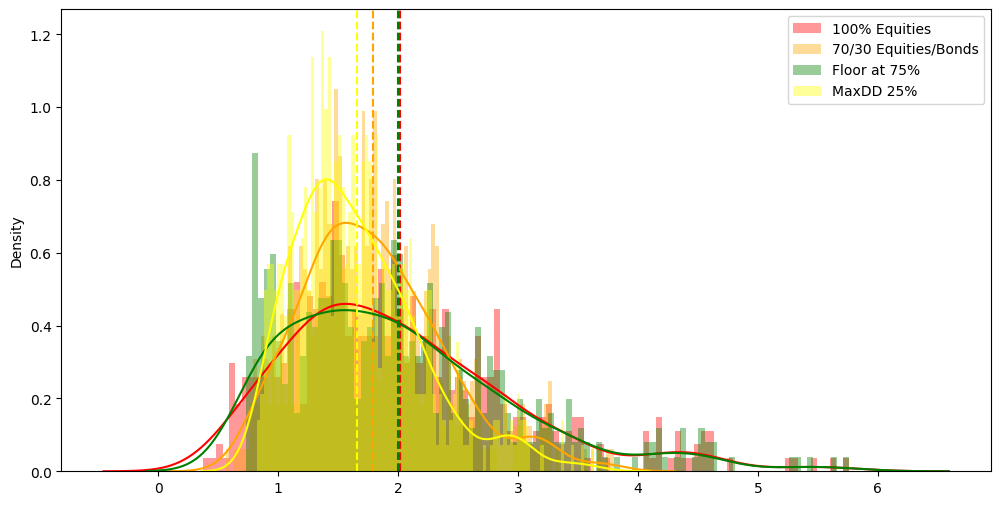

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# PLOT:
plt.figure(figsize=(12, 6))
sns.distplot(tv_eq, color="red", label="100% Equities", bins=100)
plt.axvline(tv_eq.mean(), ls="--", color="red")
sns.distplot(tv_7030b, color="orange", label="70/30 Equities/Bonds", bins=100)
plt.axvline(tv_7030b.mean(), ls="--", color="orange")
sns.distplot(tv_floor75, color="green", label="Floor at 75%", bins=100)
plt.axvline(tv_floor75.mean(), ls="--", color="green")
sns.distplot(tv_maxdd25, color="yellow", label="MaxDD 25%", bins=100)
plt.axvline(tv_maxdd25.mean(), ls="--", color="yellow")
plt.legend()
plt.show()


Equities have the max average return, but notice that it is also the one that has the most values at the rights. The floor at 75% has a very similar shape to Equities and the cost of opportunity is very small, it has an expected value good but it eliminates points below 75%.

All this we have done was made based on simulated data, but there's no reason to not use real data, as the methods and algorithms are the same.

##### **E25/R10. Finally, we are going to compare the returns produced with the 0.25 max drawdown allocation LDI strategy agains the performance of the market. For this, we need to compute the historical drawdowns, we can use for this porpouse the market returns we obtained at the begining of the coursework. Compute the drawdowns of the historical market returns, apply the LDI allocation strategy using the max drawdown constraint. Analyze the drawdowns experienced using the historical returns produced by the mentioned LDI strategy. Analyze the results. Give a wrap-up that explains how we went in this coursework from CPPI and asset simulation to dynamic asset allocation strategies with LDI. Give a general conclusion for the coursework.**

In [135]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns,
        returns a DataFrame with columns for
        the Wealth index,
        the previous peaks, and
        the percentage drawdowns
    """
    #assume you start with 1000 and compute the walth index of commulative returns
    wealth_index=None
    previous_peaks=wealth_index.cummax()
    #compute the drawdowns
    drawdowns=None
    return pd.DataFrame({"Wealth":wealth_index,
                        "Previous Peak":previous_peaks,
                        "Drawdown":drawdowns})

In [ ]:
#DRAWDOWNS OF HISTORICAL MARKET RETURNS
#Consider the total market index we constructed, now from 1990 onwards
rets_tmi=total_market_return[None]
dd_tmi=None #obtain the drawdowns of the market returns
ax=dd_tmi["Wealth"].plot(figsize=(12,6), ls="-", color="goldenrod")
dd_tmi["Previous Peak"].plot(ax=ax,ls=":",color="red")

In [ ]:
#PERFORM THE MAX DD LDI ALLOCATION STRATEGY
#compute the drawdown strategy using cash
cashrate=0.03
monthly_cashreturn=None #monthly cash returns with the defined cashrate
rets_cash=pd.DataFrame(data=monthly_cashreturn,index=rets_tmi.index,columns=[0]) #1 column dataframe

#obtain the maxdd25 returns using backtester mixer with the returns of the cash,
#the drawdown allocator, a multiplier of 5, and max drawdown of 0.25
rets_maxdd25=None(pd.DataFrame(rets_tmi),None,allocator=None,maxdd=None,m=None)
dd_25=drawdown(rets_maxdd25[0])


In [ ]:
#Plot and analyze